## Prepare Notebook

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pymc as pm

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
seed: int = sum(map(ord, "bayesian_ab_testing"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

## Non-Informative Model

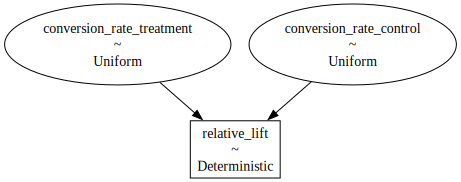

In [3]:
with pm.Model() as non_informative_model:
    conversion_rate_control = pm.Uniform("conversion_rate_control", lower=0, upper=1)
    conversion_rate_treatment = pm.Uniform(
        "conversion_rate_treatment", lower=0, upper=1
    )
    relative_lift = pm.Deterministic(
        "relative_lift",
        conversion_rate_treatment / conversion_rate_control - 1,
    )

pm.model_to_graphviz(non_informative_model)

In [4]:
with non_informative_model:
    non_informative_prior_samples = pm.sample_prior_predictive(
        samples=1_000, random_seed=rng
    )


Sampling: [conversion_rate_control, conversion_rate_treatment]


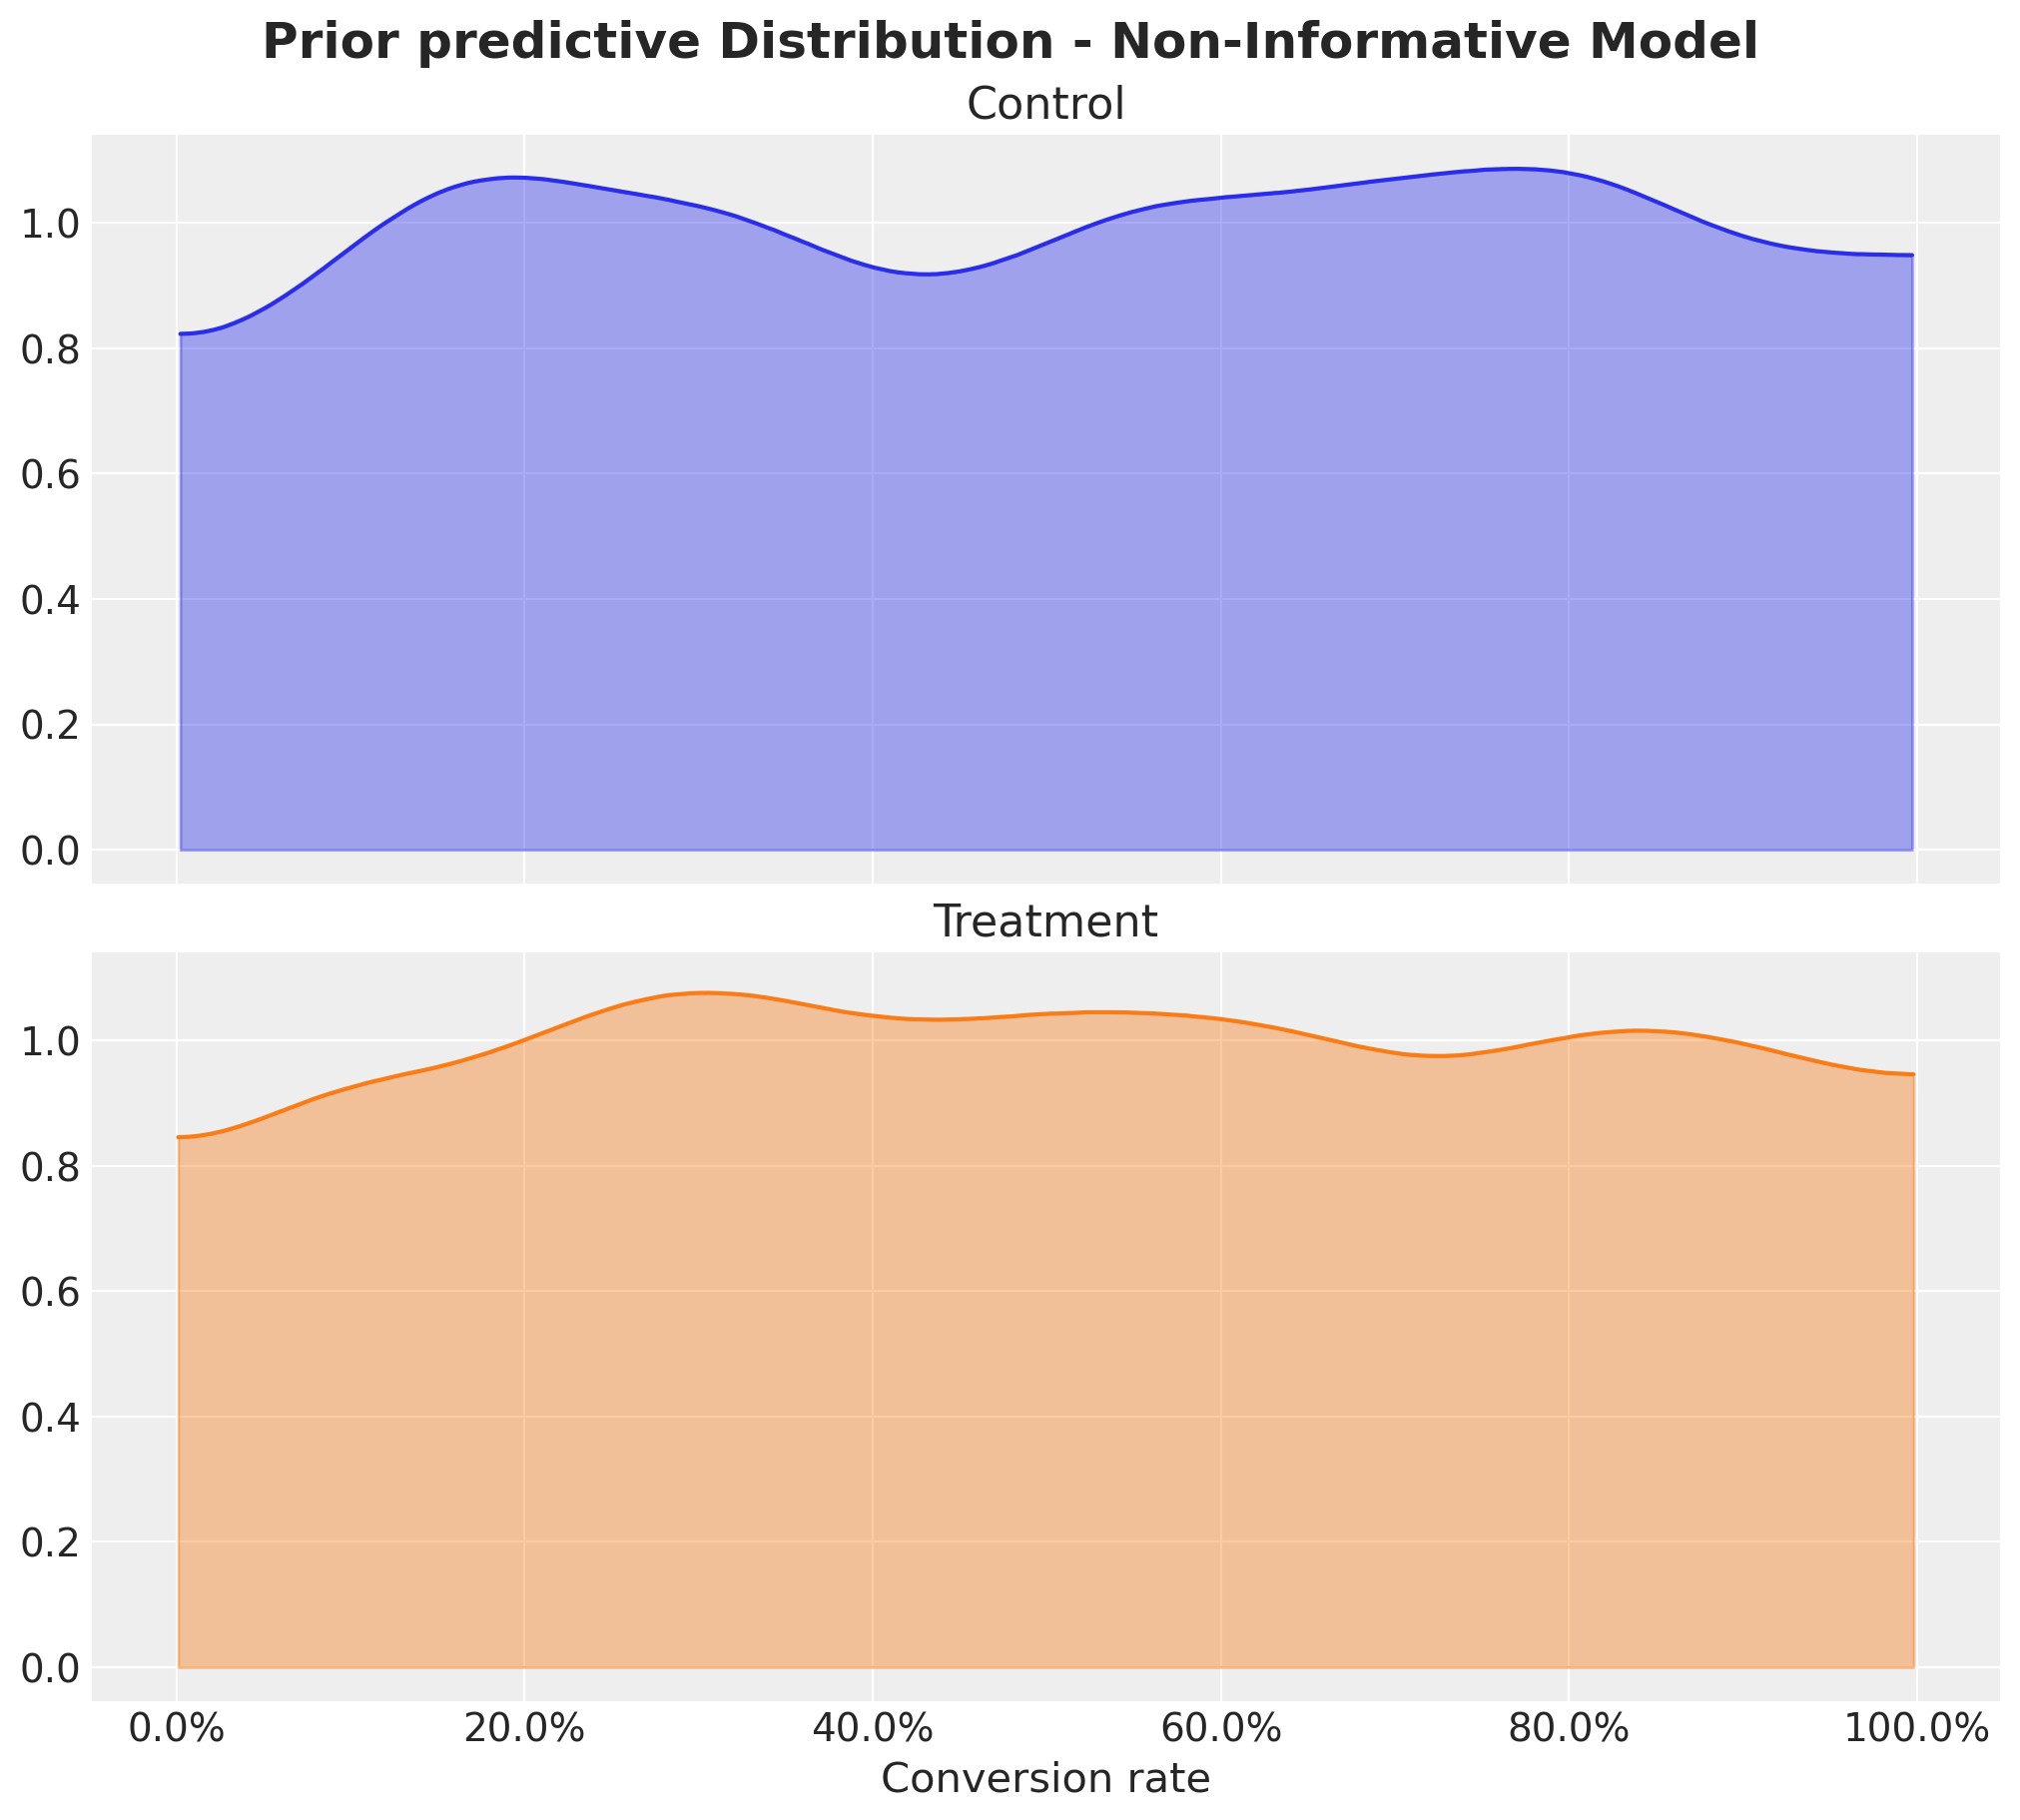

In [5]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 9), sharex=True, sharey=True, layout="constrained"
)

az.plot_dist(
    non_informative_prior_samples["prior"]["conversion_rate_control"],
    color="C0",
    fill_kwargs={"alpha": 0.4},
    ax=ax[0],
)
ax[0].set_title("Control")

az.plot_dist(
    non_informative_prior_samples["prior"]["conversion_rate_treatment"],
    color="C1",
    fill_kwargs={"alpha": 0.4},
    ax=ax[1],
)
ax[1].set_title("Treatment")
ax[1].set_xlabel("Conversion rate")
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
fig.suptitle(
    "Prior predictive Distribution - Non-Informative Model",
    fontsize=18,
    fontweight="bold",
);


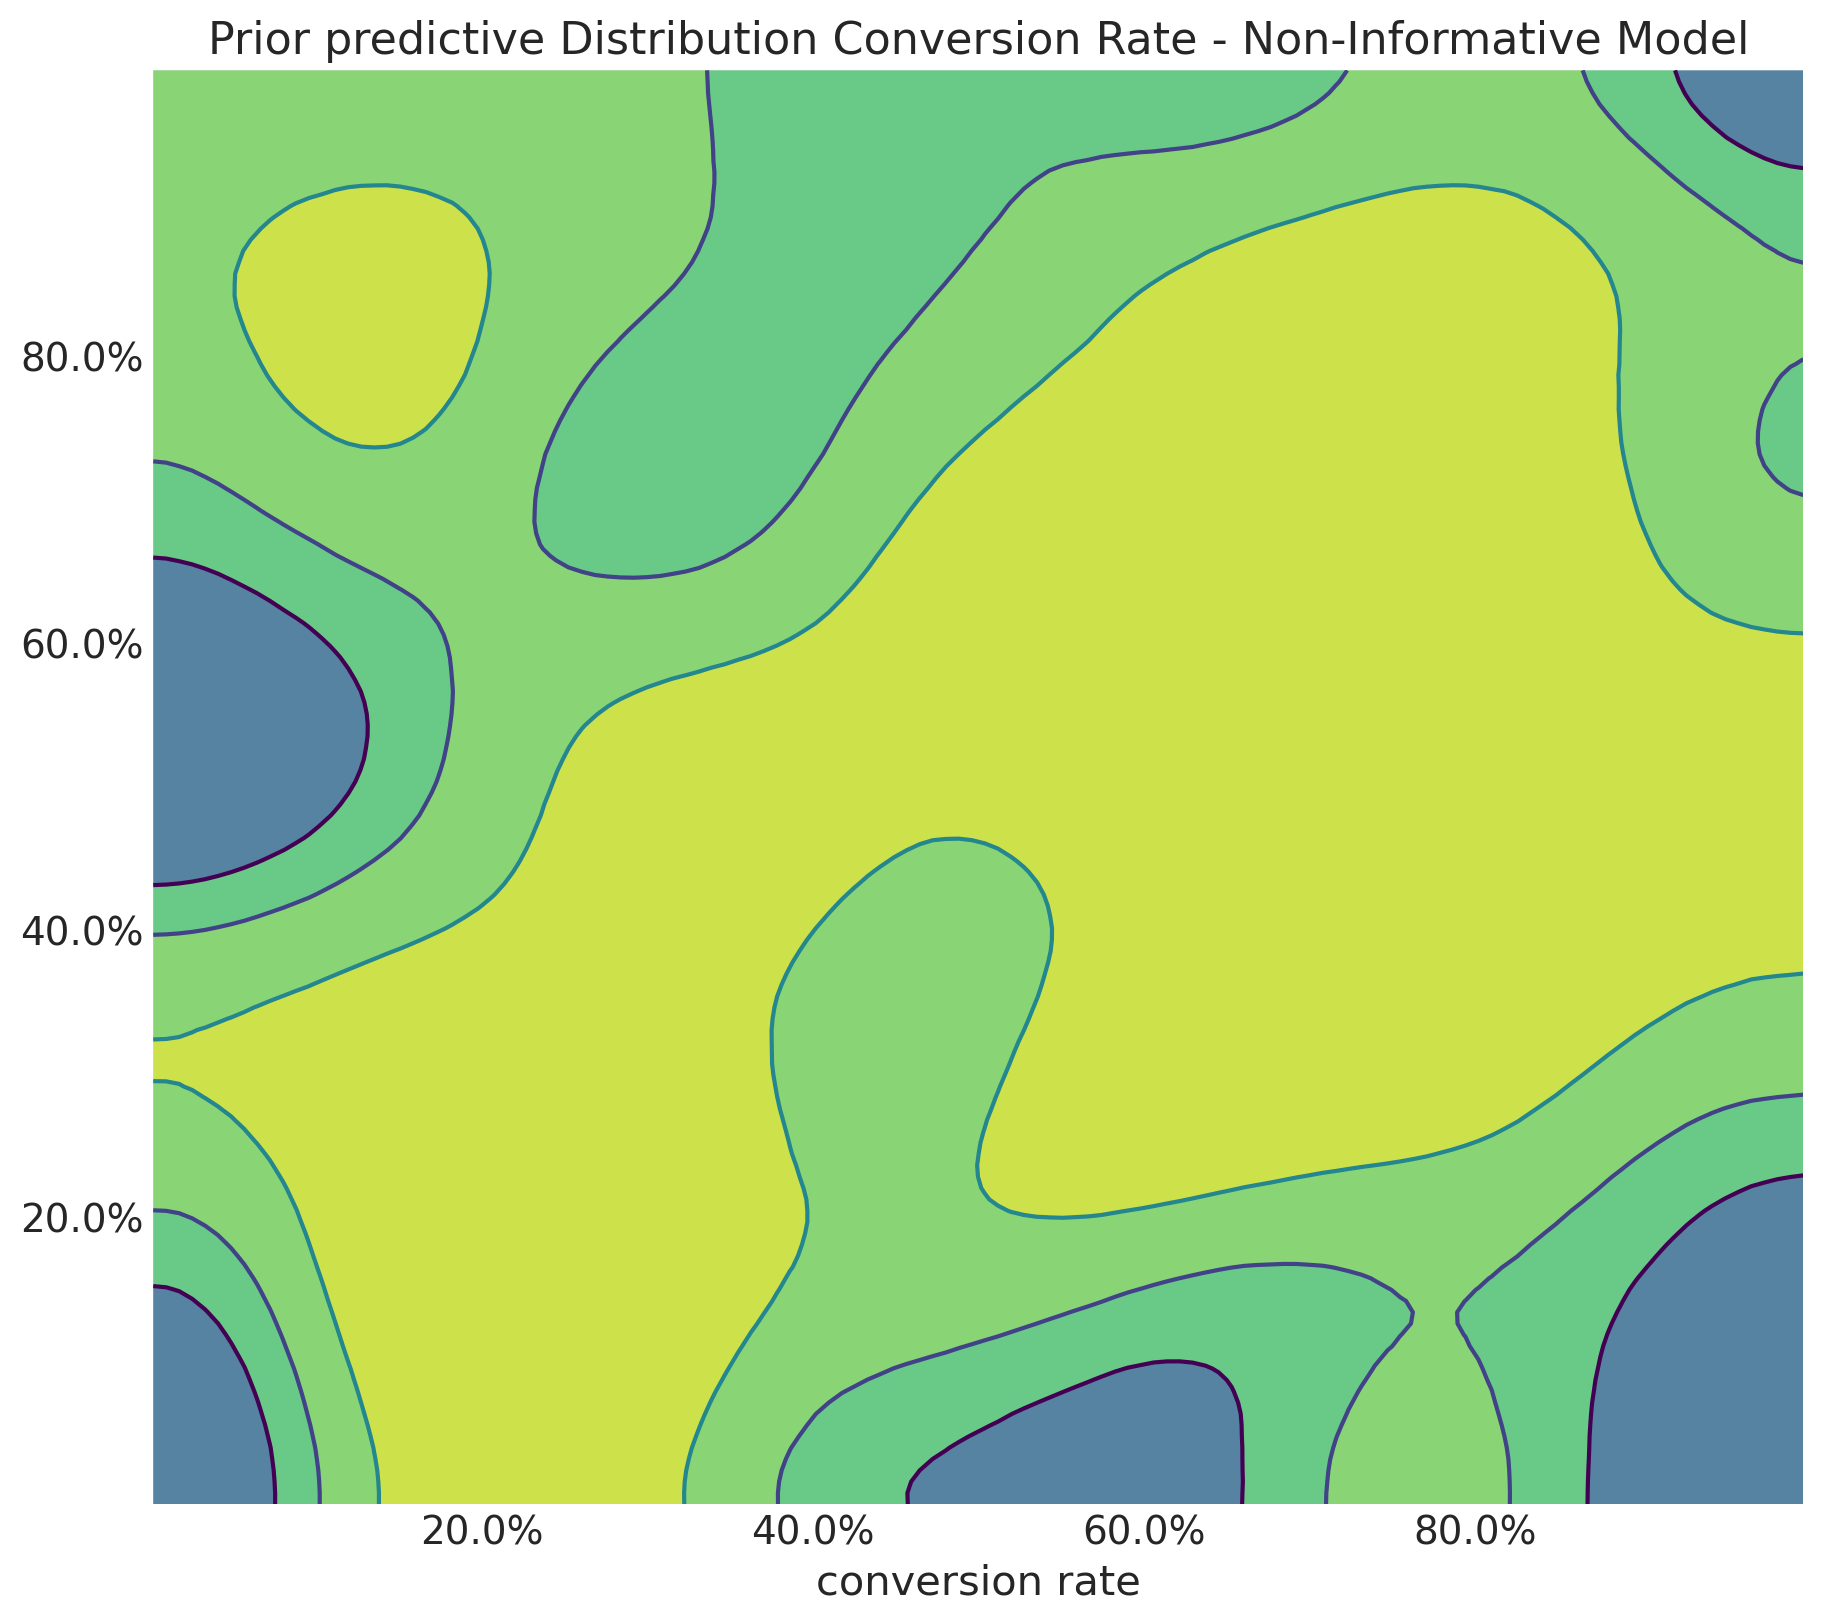

In [6]:
fig, ax = plt.subplots(figsize=(9, 8))
az.plot_dist(
    values=non_informative_prior_samples["prior"]["conversion_rate_control"],
    values2=non_informative_prior_samples["prior"]["conversion_rate_treatment"],
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis},
    contourf_kwargs={"alpha": 0.8},
    ax=ax,
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.set(
    title="Prior predictive Distribution Conversion Rate - Non-Informative Model",
    xlabel="conversion rate",
);


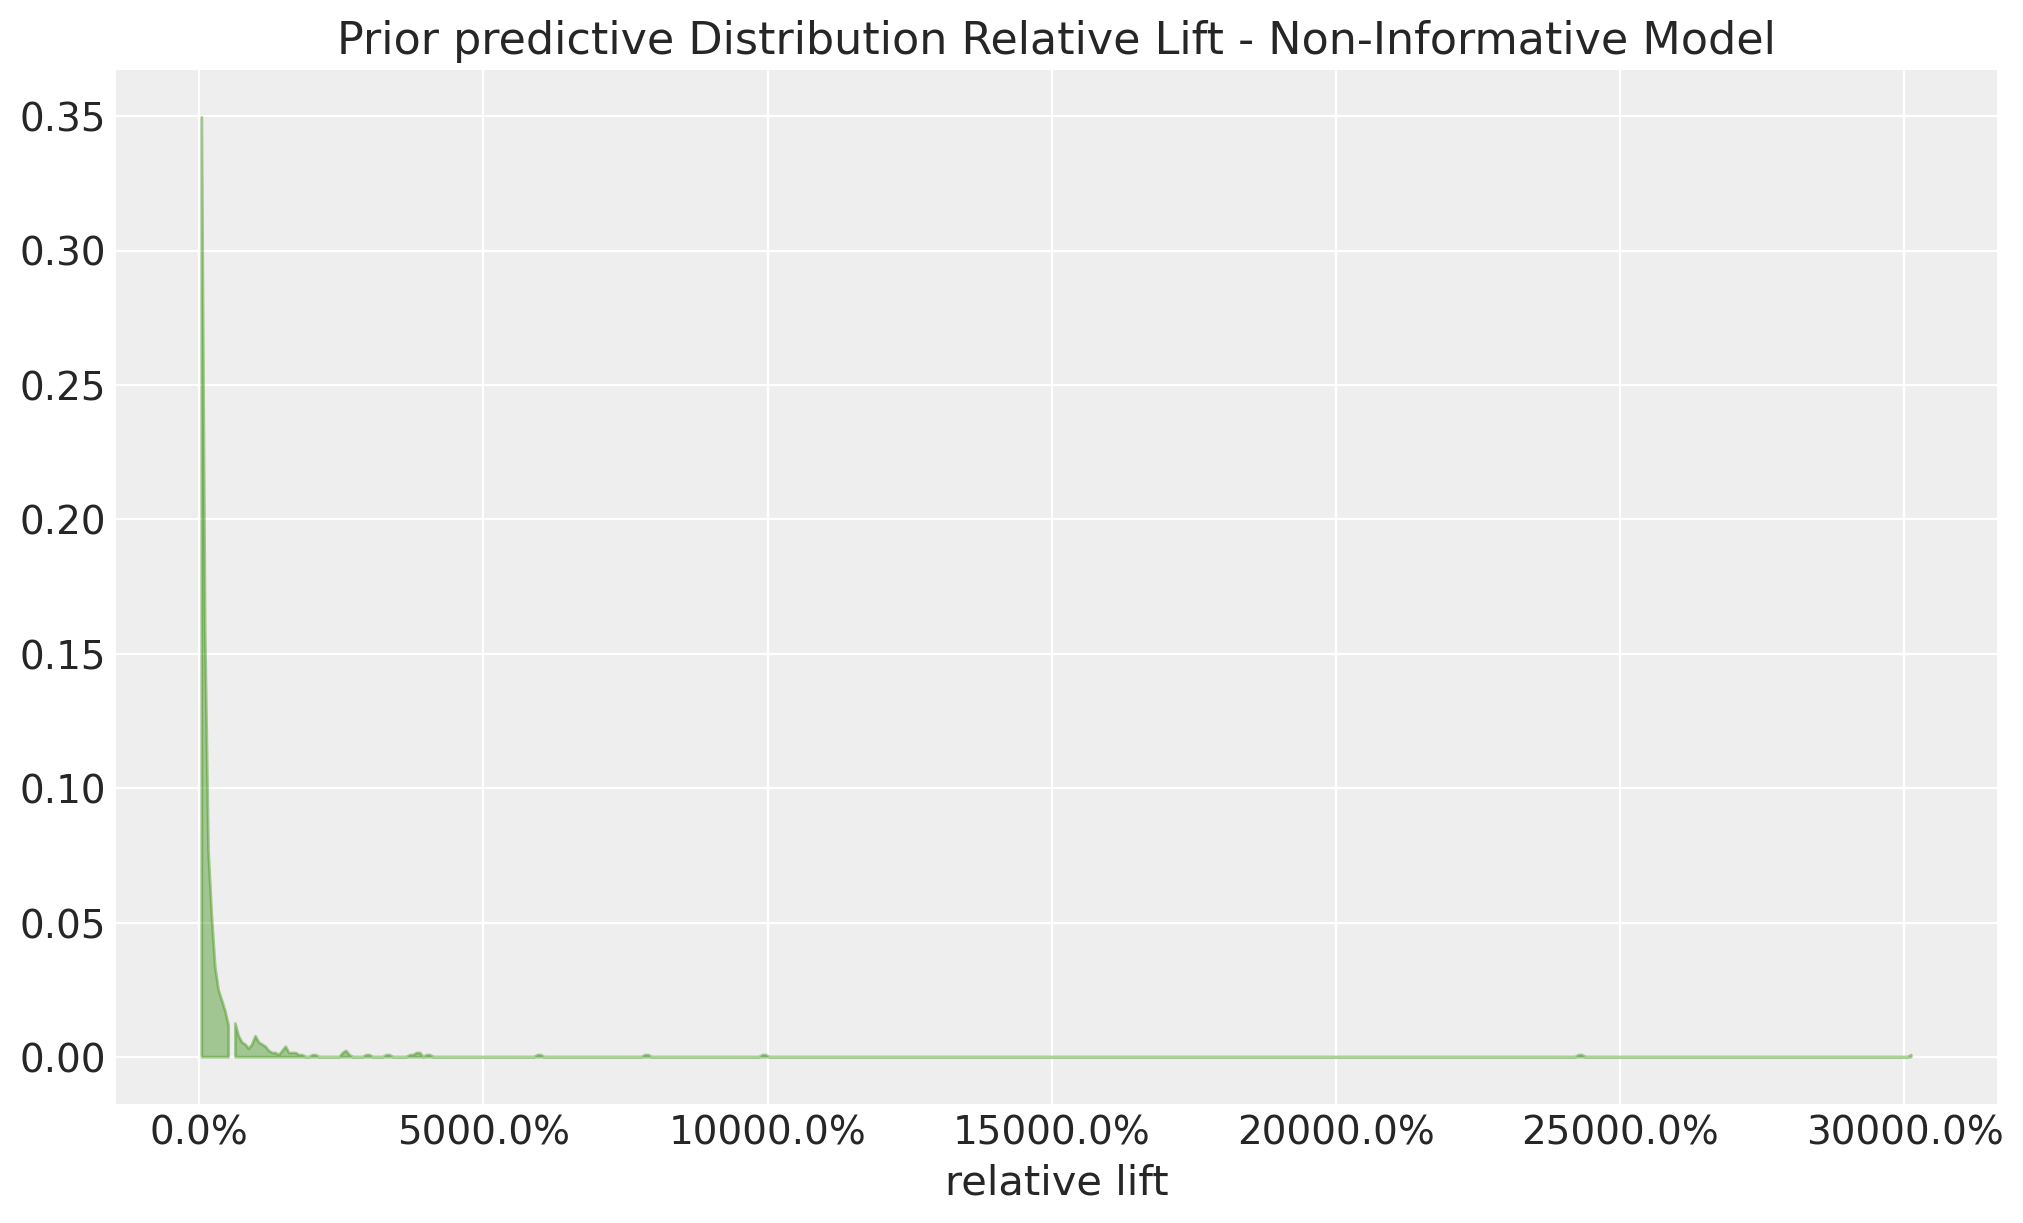

In [7]:
fig, ax = plt.subplots()
az.plot_dist(
    non_informative_prior_samples["prior"]["relative_lift"],
    color="C2",
    quantiles=[0.06, 0.5, 0.94],
    fill_kwargs={"alpha": 0.4},
    ax=ax,
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.set(
    title="Prior predictive Distribution Relative Lift - Non-Informative Model",
    xlabel="relative lift",
);


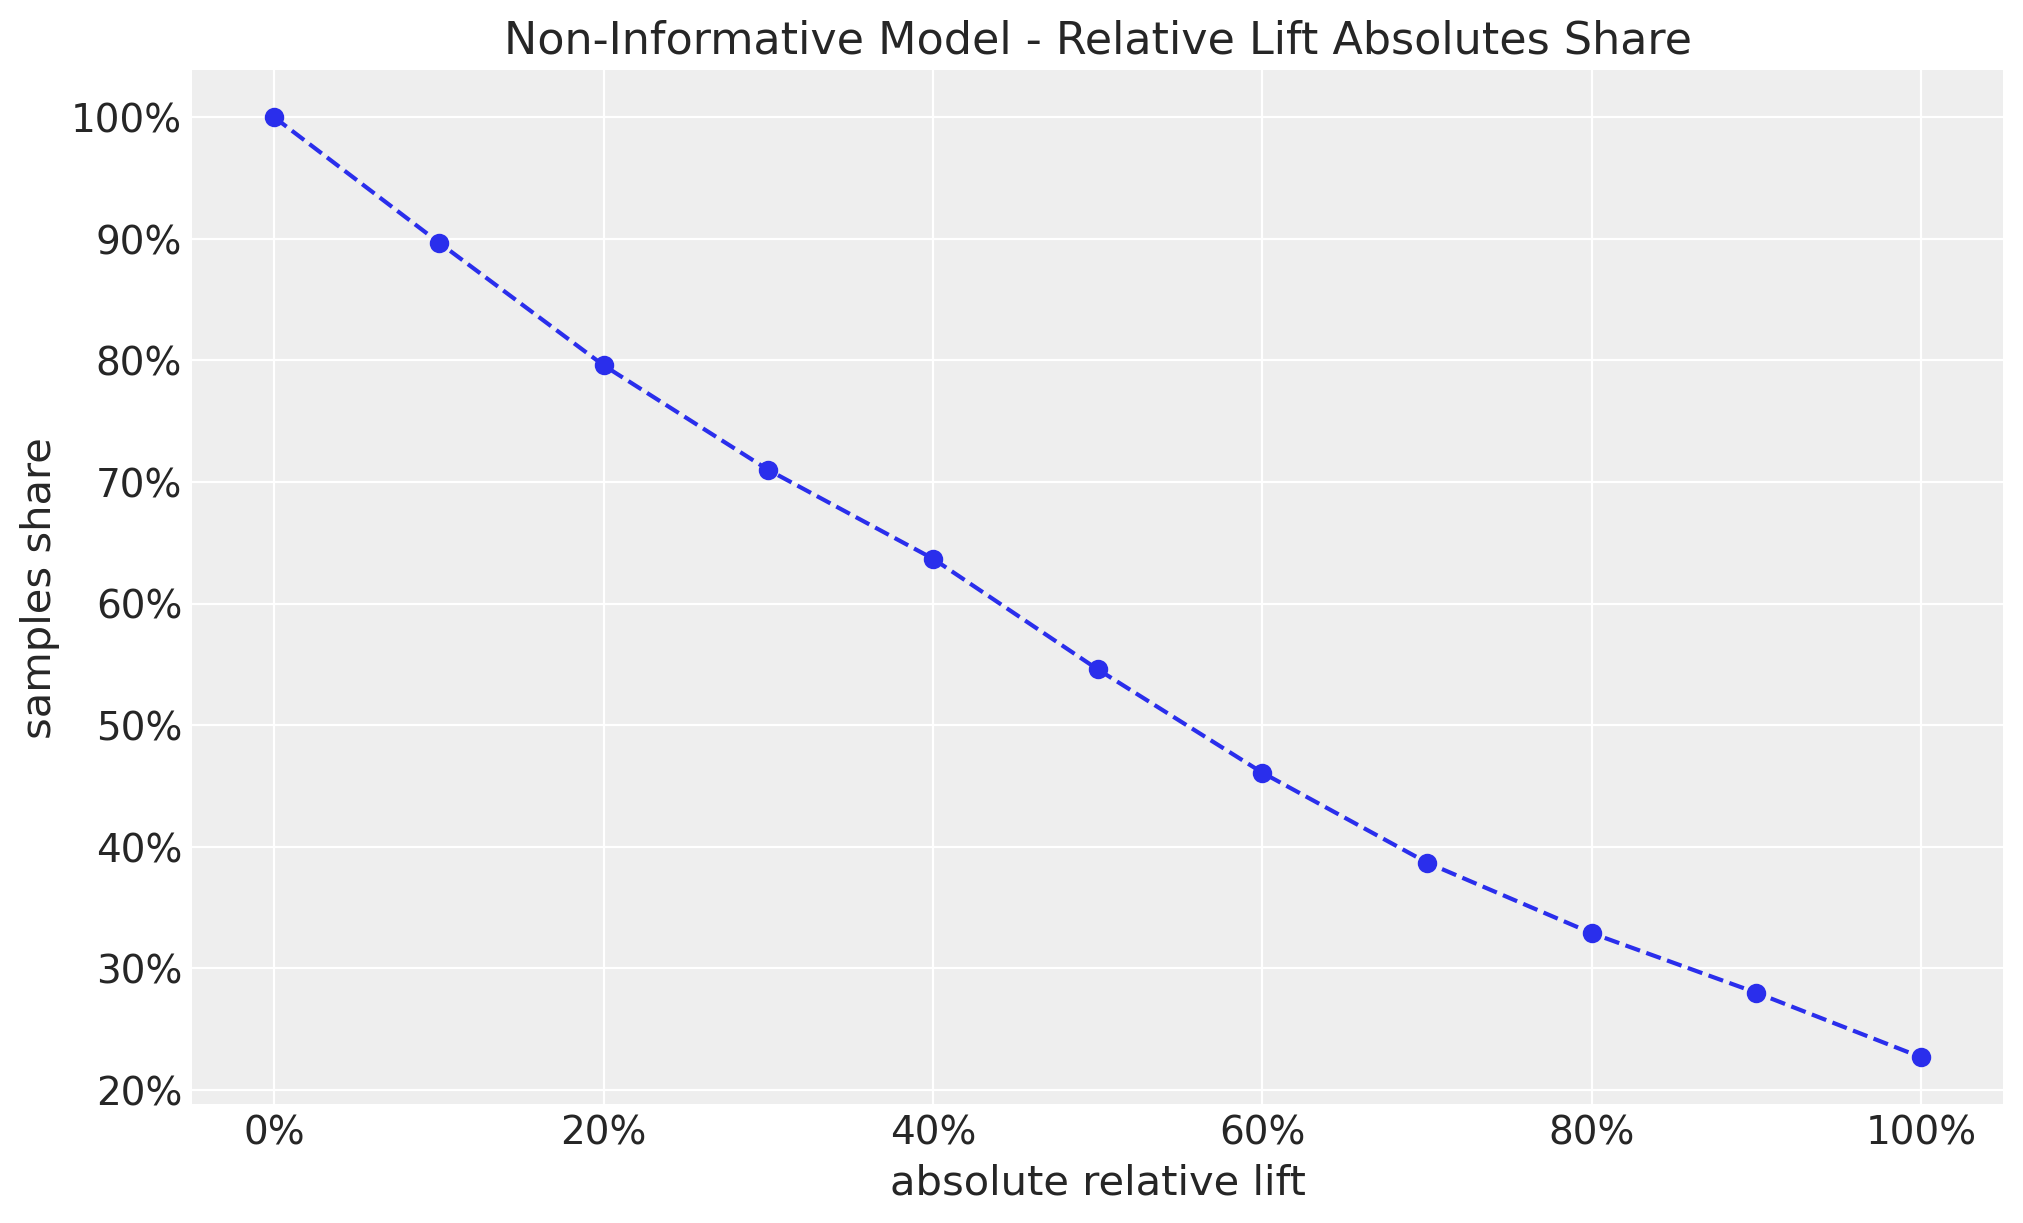

In [8]:
thresholds = np.linspace(start=0, stop=1, num=11)

shares = [
    (
        np.abs(non_informative_prior_samples["prior"]["relative_lift"]) >= threshold
    ).mean()
    for threshold in thresholds
]

fig, ax = plt.subplots()
ax.plot(thresholds, shares, marker="o", linestyle="--", color="C0")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.set(
    title="Non-Informative Model - Relative Lift Absolutes Share",
    xlabel="absolute relative lift",
    ylabel="samples share",
);


## Informative Model

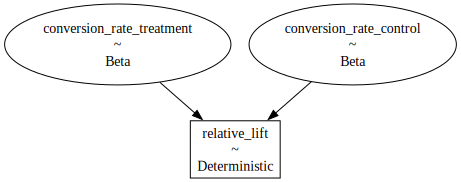

In [9]:
with pm.Model() as informative_model:
    conversion_rate_control = pm.Beta("conversion_rate_control", alpha=15, beta=600)
    conversion_rate_treatment = pm.Beta("conversion_rate_treatment", alpha=15, beta=600)
    relative_lift = pm.Deterministic(
        "relative_lift",
        conversion_rate_treatment / conversion_rate_control - 1,
    )

pm.model_to_graphviz(informative_model)

In [10]:
with informative_model:
    informative_prior_samples = pm.sample_prior_predictive(
        samples=1_000, random_seed=rng
    )


Sampling: [conversion_rate_control, conversion_rate_treatment]


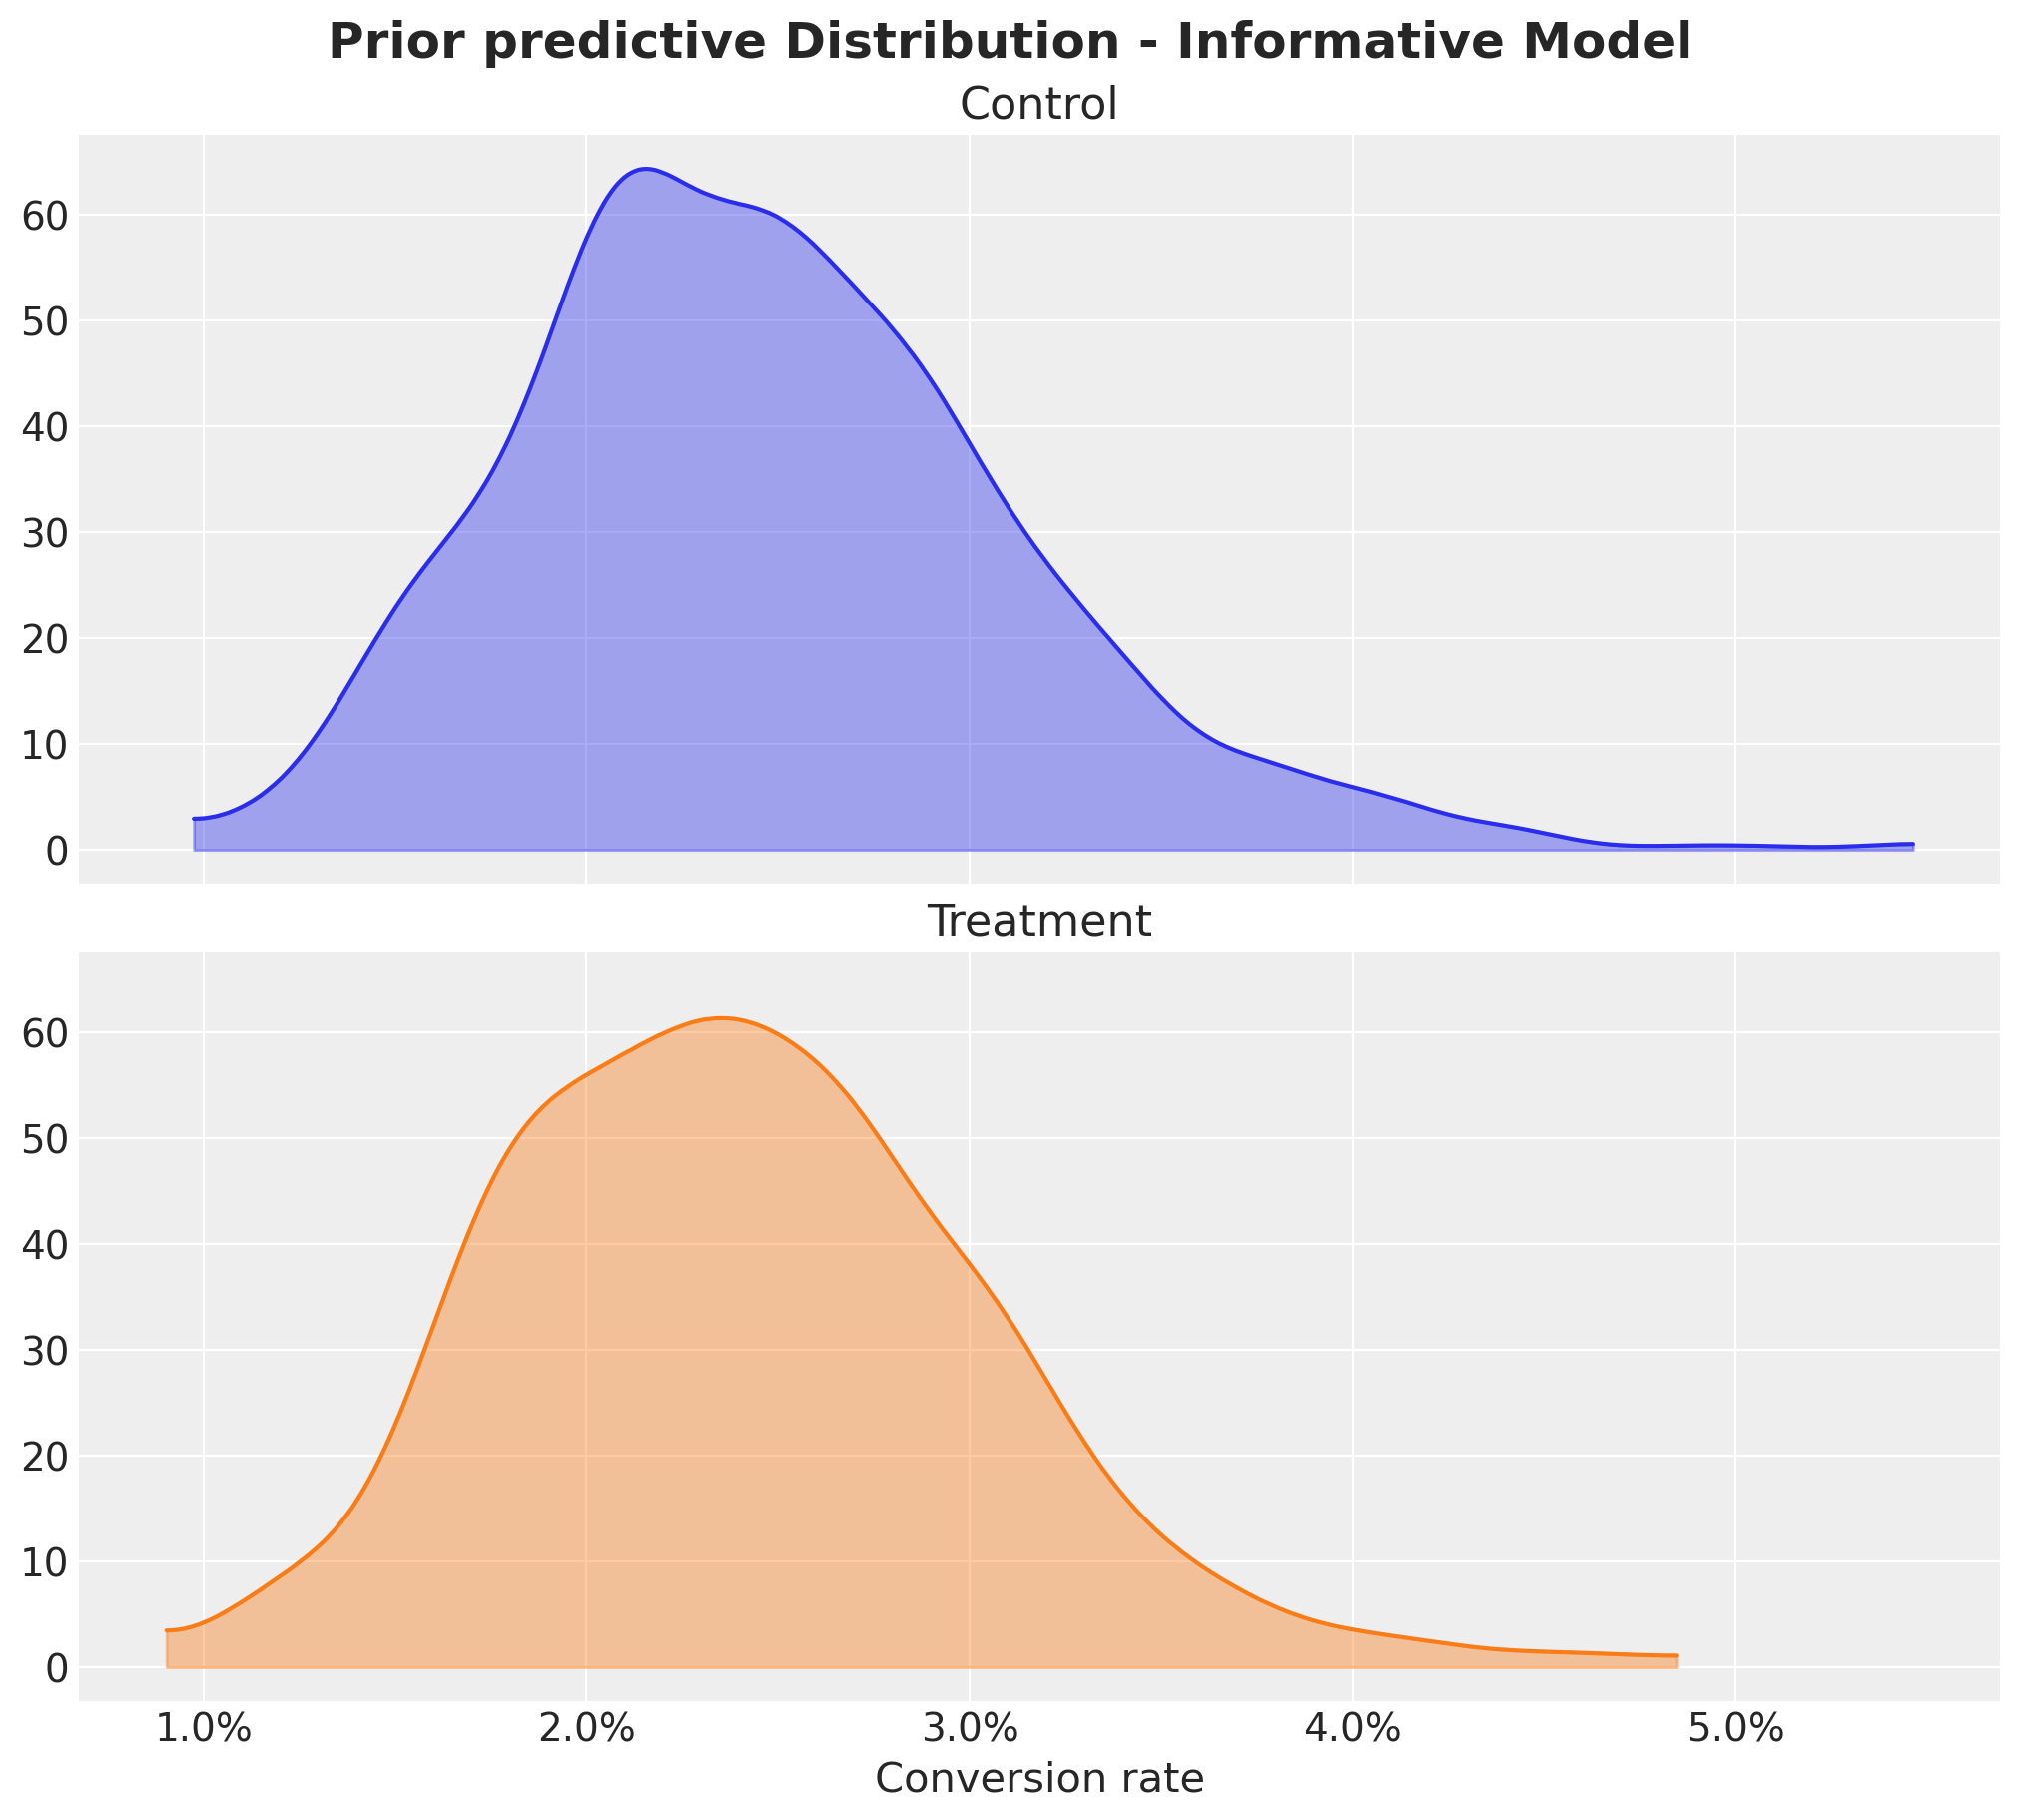

In [11]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 9), sharex=True, sharey=True, layout="constrained"
)

az.plot_dist(
    informative_prior_samples["prior"]["conversion_rate_control"],
    color="C0",
    fill_kwargs={"alpha": 0.4},
    ax=ax[0],
)
ax[0].set_title("Control")

az.plot_dist(
    informative_prior_samples["prior"]["conversion_rate_treatment"],
    color="C1",
    fill_kwargs={"alpha": 0.4},
    ax=ax[1],
)
ax[1].set_title("Treatment")
ax[1].set_xlabel("Conversion rate")
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
fig.suptitle(
    "Prior predictive Distribution - Informative Model", fontsize=18, fontweight="bold"
);


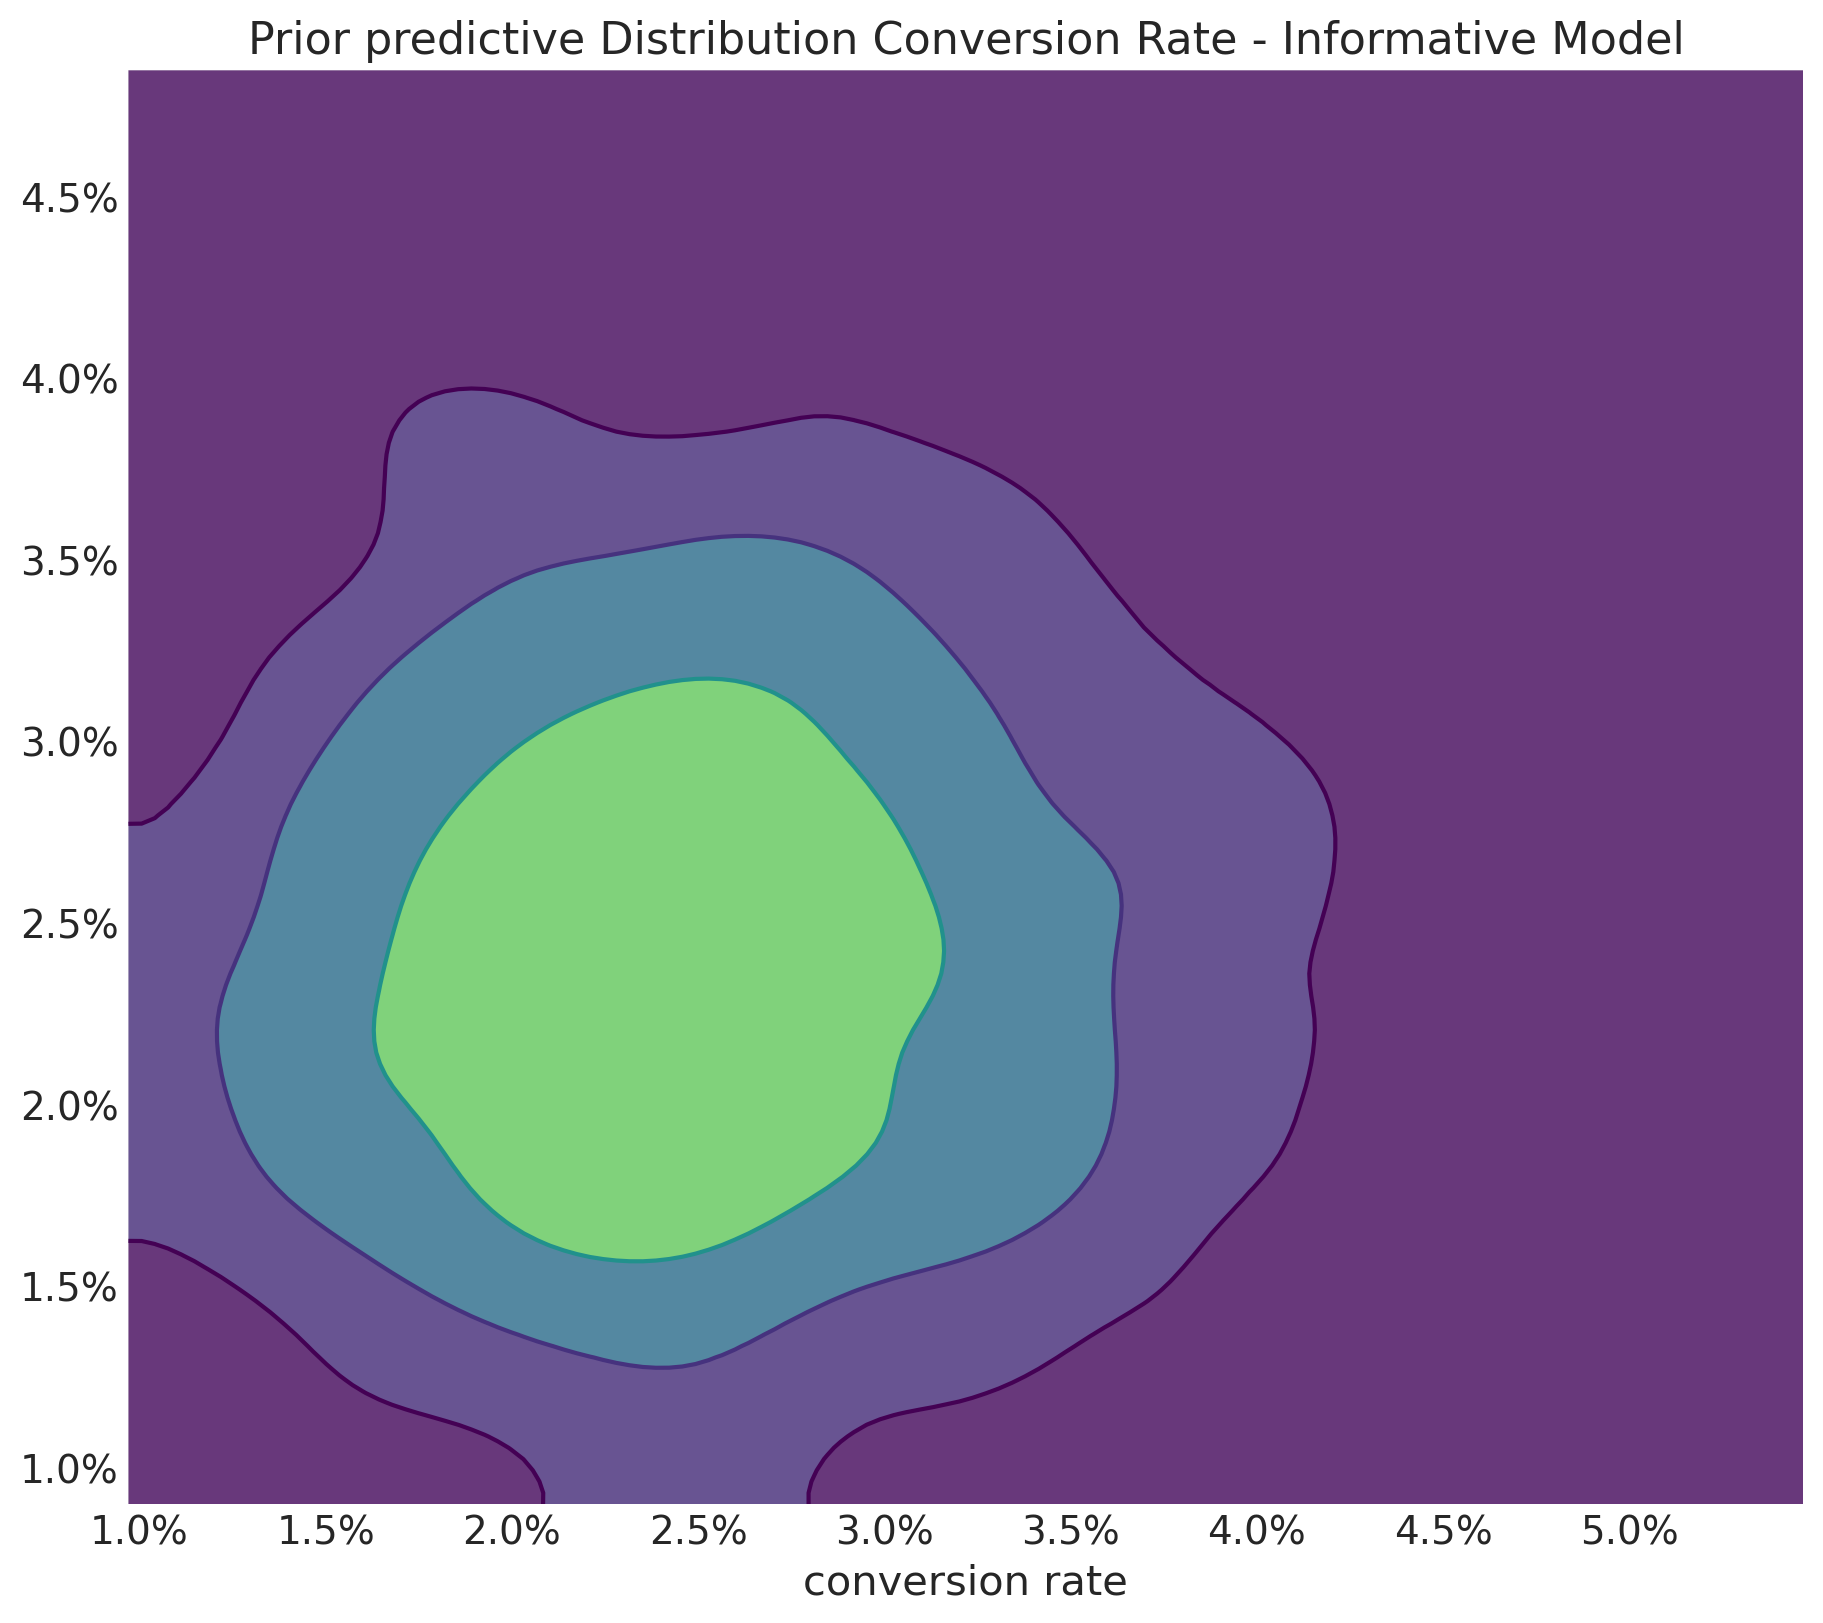

In [12]:
fig, ax = plt.subplots(figsize=(9, 8))
az.plot_dist(
    values=informative_prior_samples["prior"]["conversion_rate_control"],
    values2=informative_prior_samples["prior"]["conversion_rate_treatment"],
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis},
    contourf_kwargs={"alpha": 0.8},
    ax=ax,
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.set(
    title="Prior predictive Distribution Conversion Rate - Informative Model",
    xlabel="conversion rate",
);


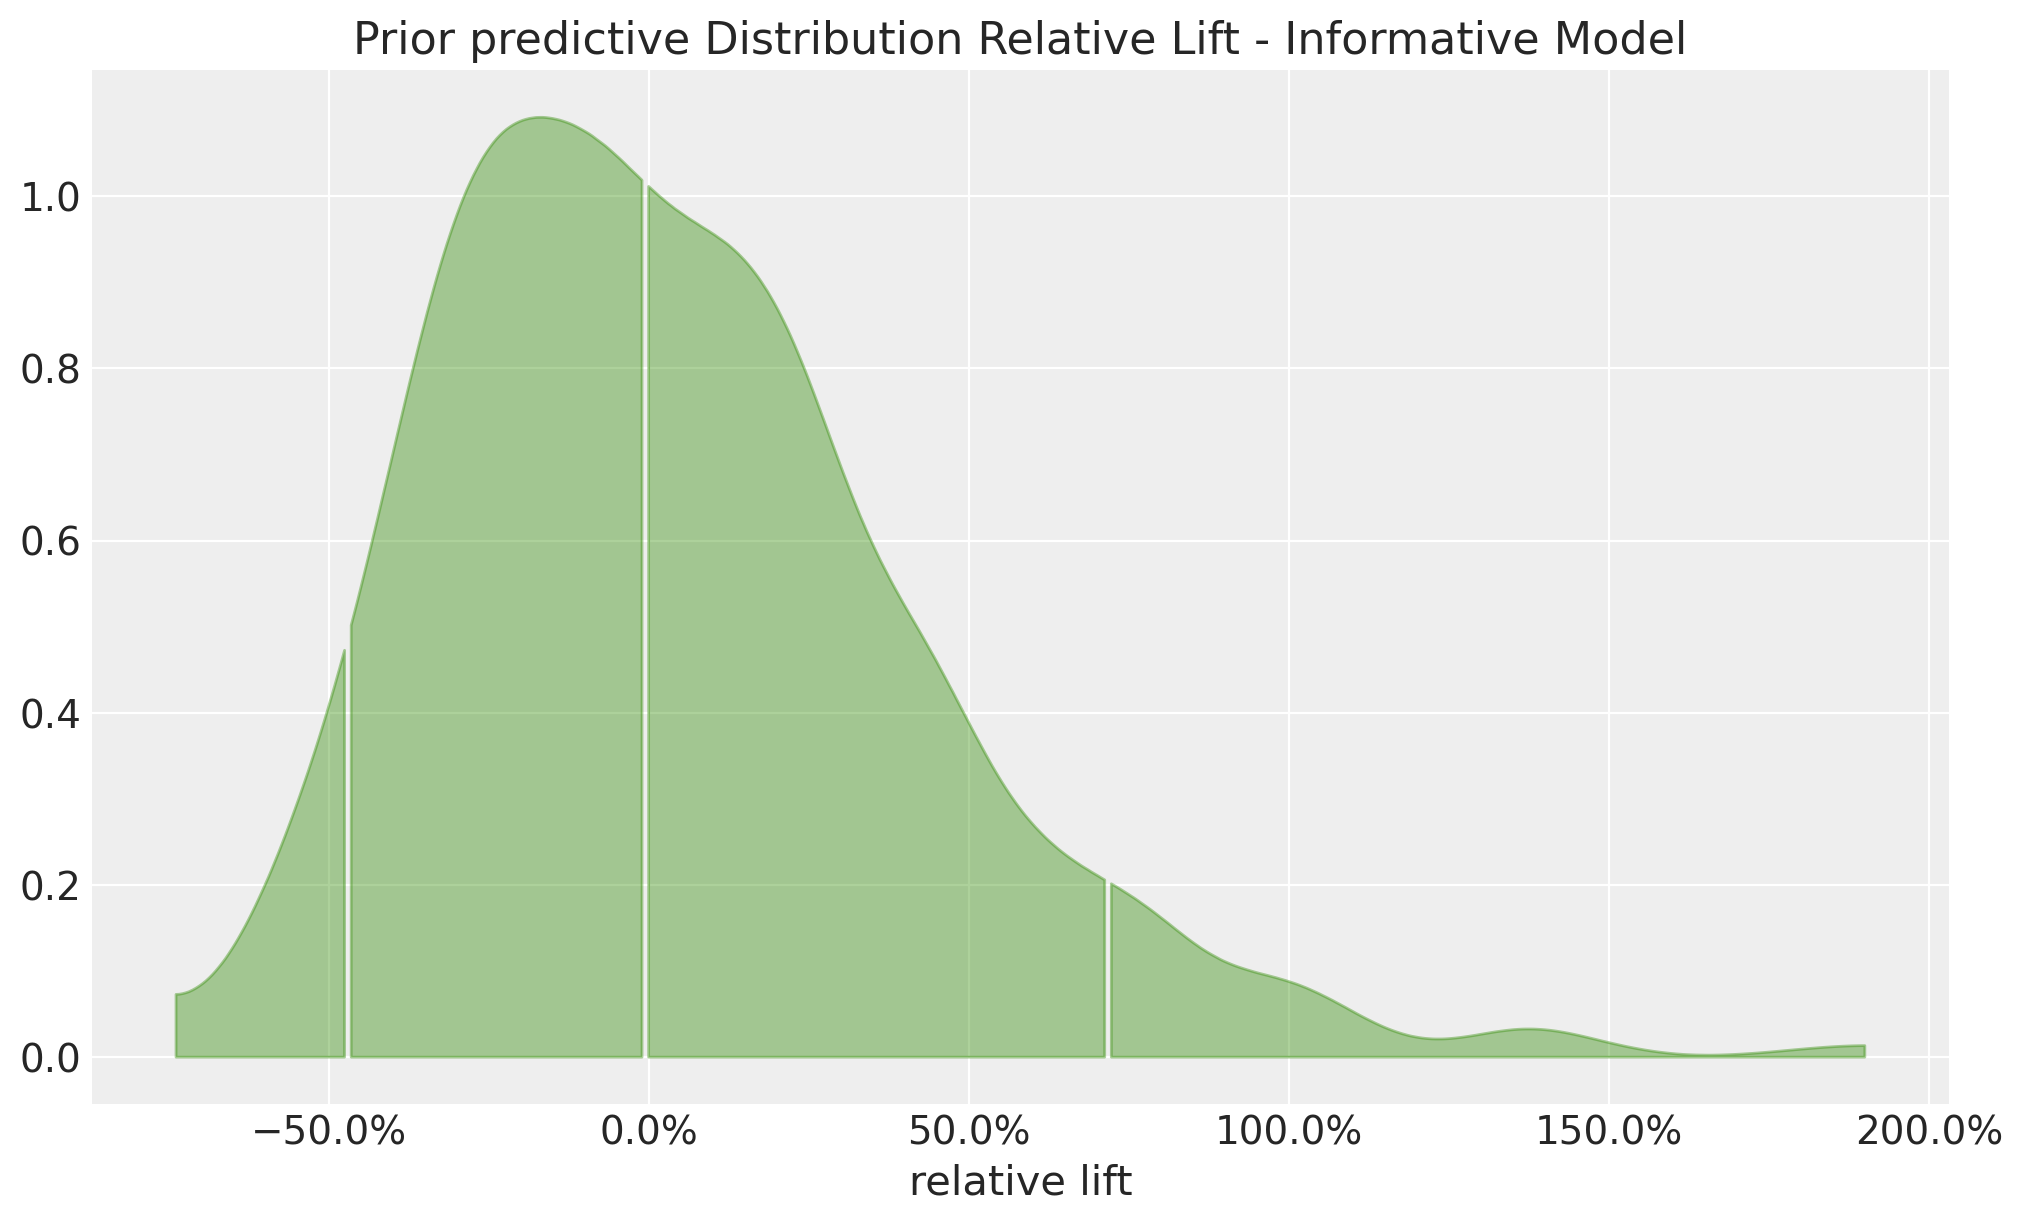

In [13]:
fig, ax = plt.subplots()
az.plot_dist(
    informative_prior_samples["prior"]["relative_lift"],
    color="C2",
    quantiles=[0.06, 0.5, 0.94],
    fill_kwargs={"alpha": 0.4},
    ax=ax,
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.set(
    title="Prior predictive Distribution Relative Lift - Informative Model",
    xlabel="relative lift",
);


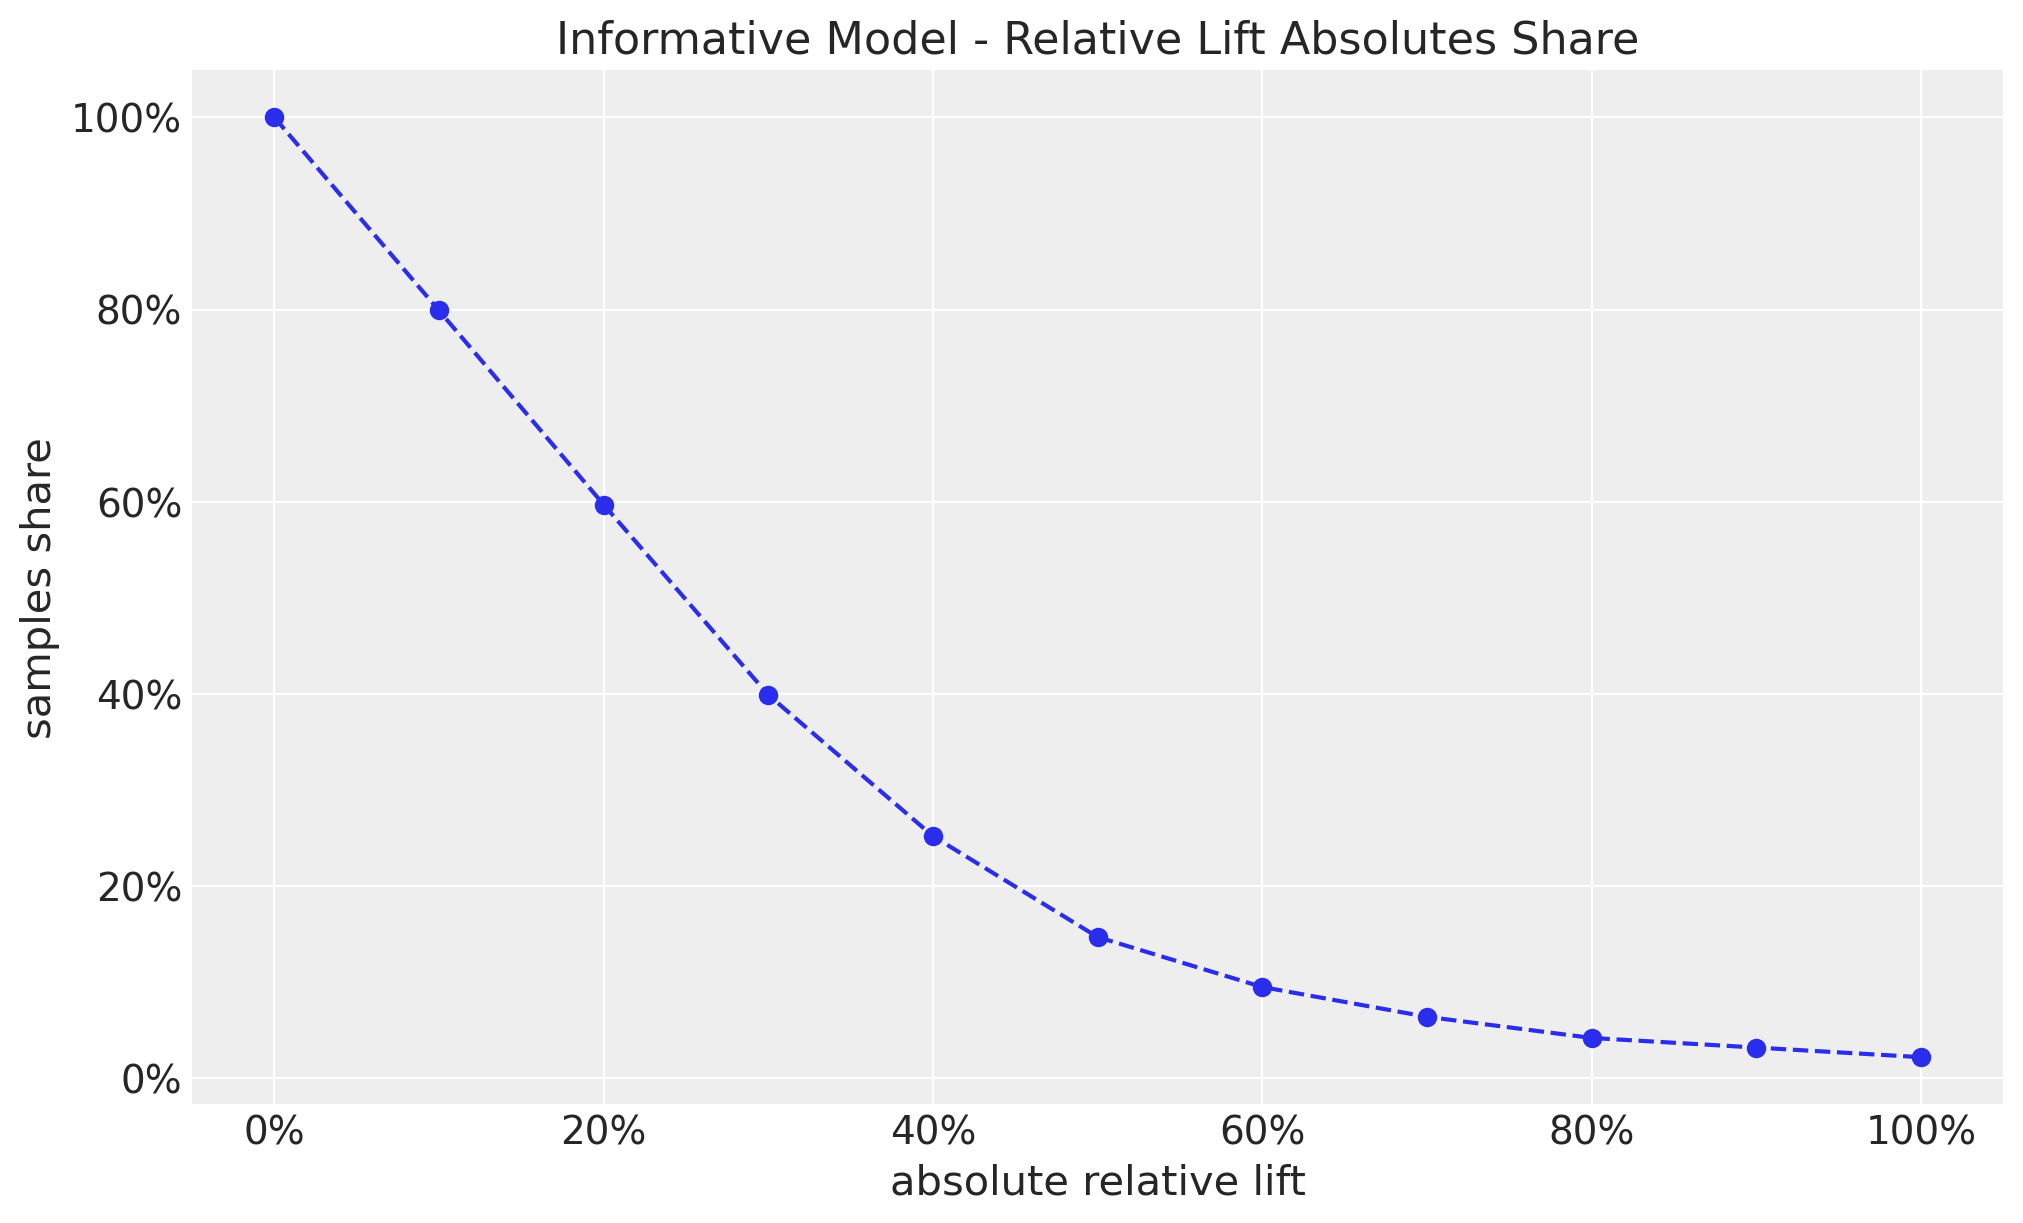

In [14]:
thresholds = np.linspace(start=0, stop=1, num=11)

shares = [
    (np.abs(informative_prior_samples["prior"]["relative_lift"]) >= threshold).mean()
    for threshold in thresholds
]

fig, ax = plt.subplots()
ax.plot(thresholds, shares, marker="o", linestyle="--", color="C0")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.set(
    title="Informative Model - Relative Lift Absolutes Share",
    xlabel="absolute relative lift",
    ylabel="samples share",
);


## Correlated Model

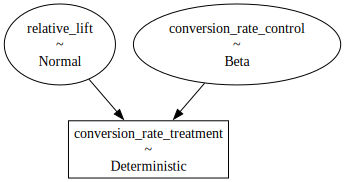

In [15]:
with pm.Model() as correlated_model:
    conversion_rate_control = pm.Beta("conversion_rate_control", alpha=15, beta=600)
    relative_lift = pm.Normal("relative_lift", mu=0, sigma=0.1)
    conversion_rate_treatment = pm.Deterministic(
        "conversion_rate_treatment", conversion_rate_control * (1 + relative_lift)
    )

pm.model_to_graphviz(correlated_model)

In [16]:
with correlated_model:
    correlated_prior_samples = pm.sample_prior_predictive(
        samples=1_000, random_seed=rng
    )


Sampling: [conversion_rate_control, relative_lift]


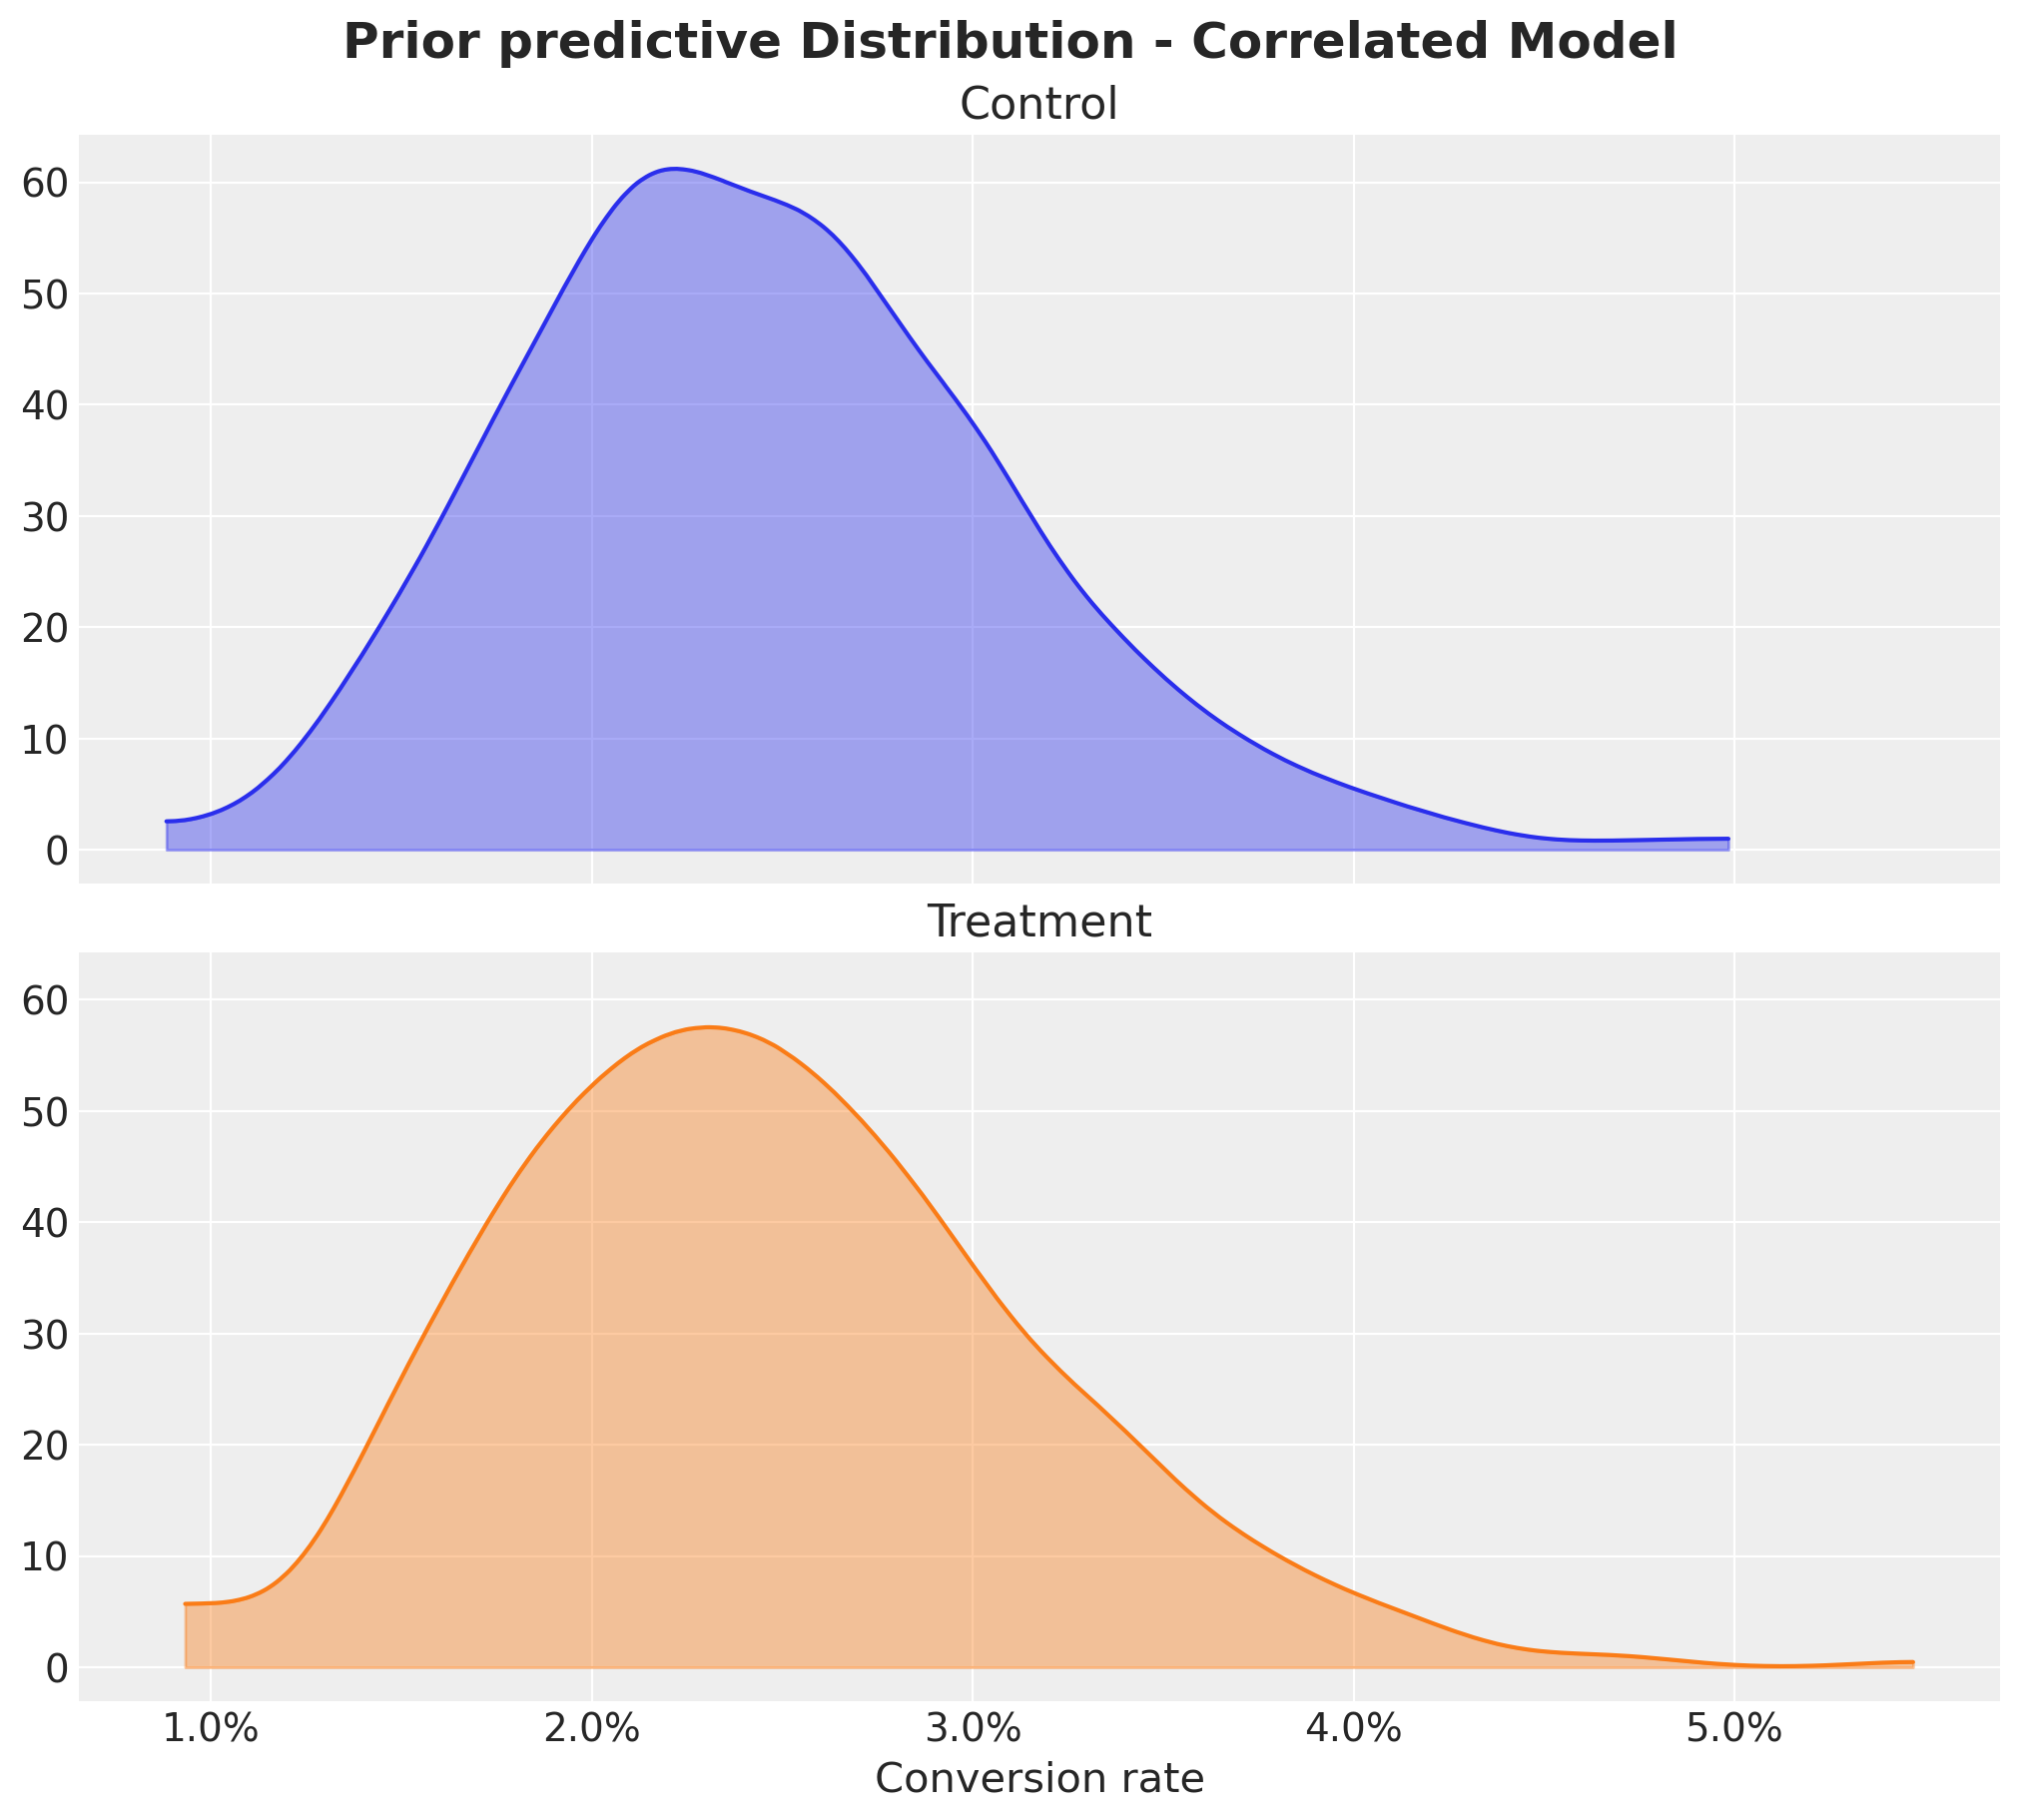

In [17]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 9), sharex=True, sharey=True, layout="constrained"
)

az.plot_dist(
    correlated_prior_samples["prior"]["conversion_rate_control"],
    color="C0",
    fill_kwargs={"alpha": 0.4},
    ax=ax[0],
)
ax[0].set_title("Control")

az.plot_dist(
    correlated_prior_samples["prior"]["conversion_rate_treatment"],
    color="C1",
    fill_kwargs={"alpha": 0.4},
    ax=ax[1],
)
ax[1].set_title("Treatment")
ax[1].set_xlabel("Conversion rate")
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
fig.suptitle(
    "Prior predictive Distribution - Correlated Model", fontsize=18, fontweight="bold"
);

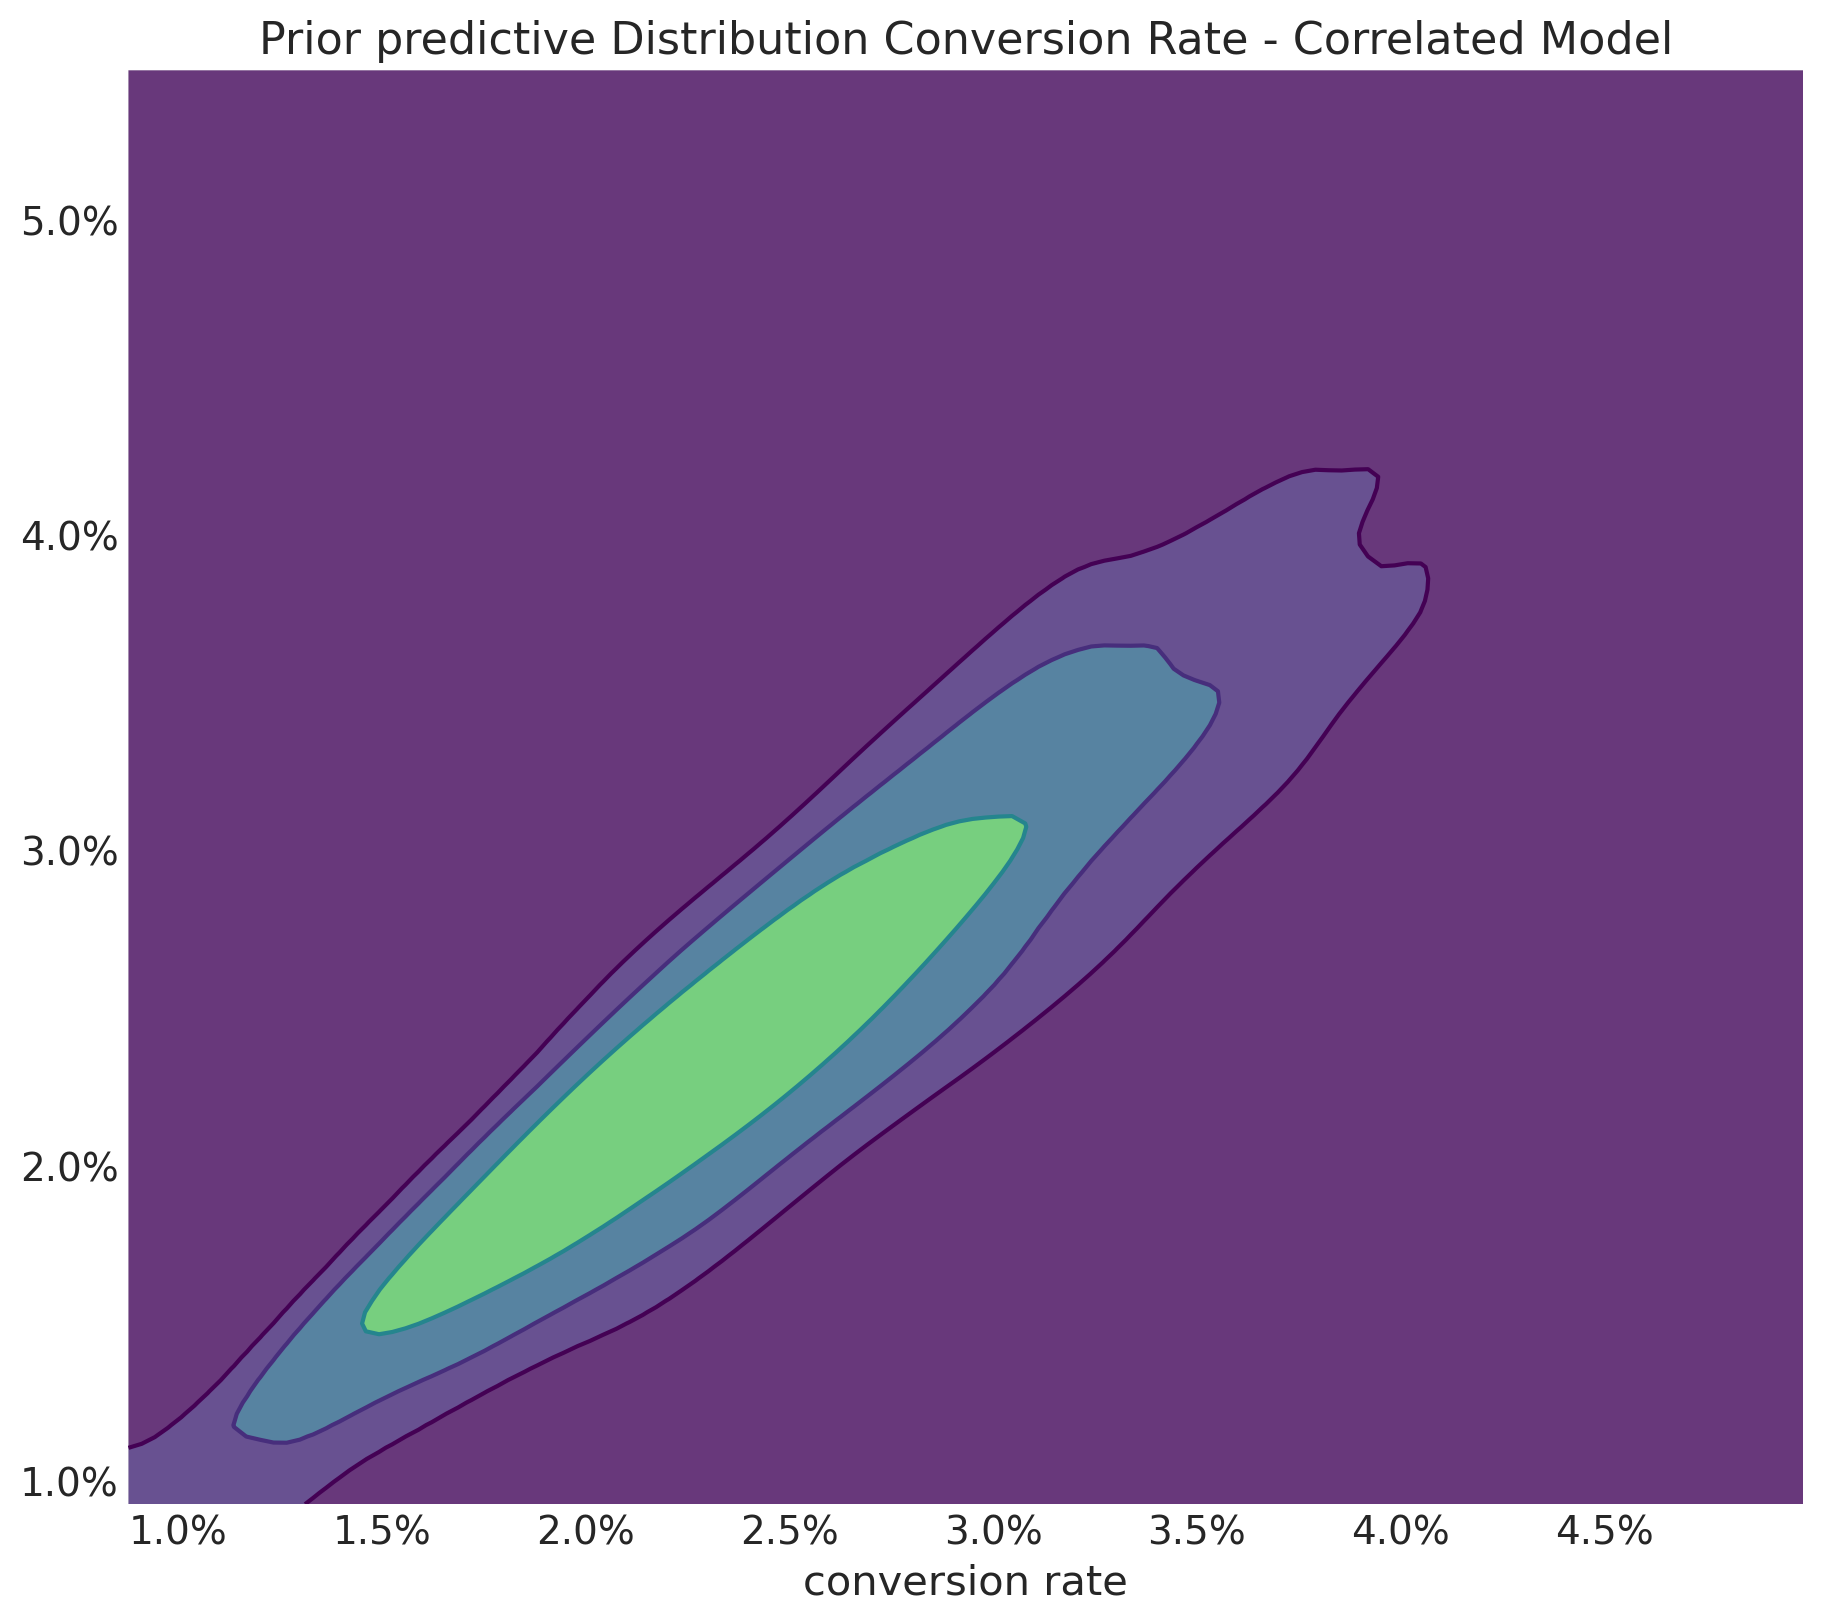

In [18]:
fig, ax = plt.subplots(figsize=(9, 8))
az.plot_dist(
    values=correlated_prior_samples["prior"]["conversion_rate_control"],
    values2=correlated_prior_samples["prior"]["conversion_rate_treatment"],
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis},
    contourf_kwargs={"alpha": 0.8},
    ax=ax,
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.set(
    title="Prior predictive Distribution Conversion Rate - Correlated Model",
    xlabel="conversion rate",
);


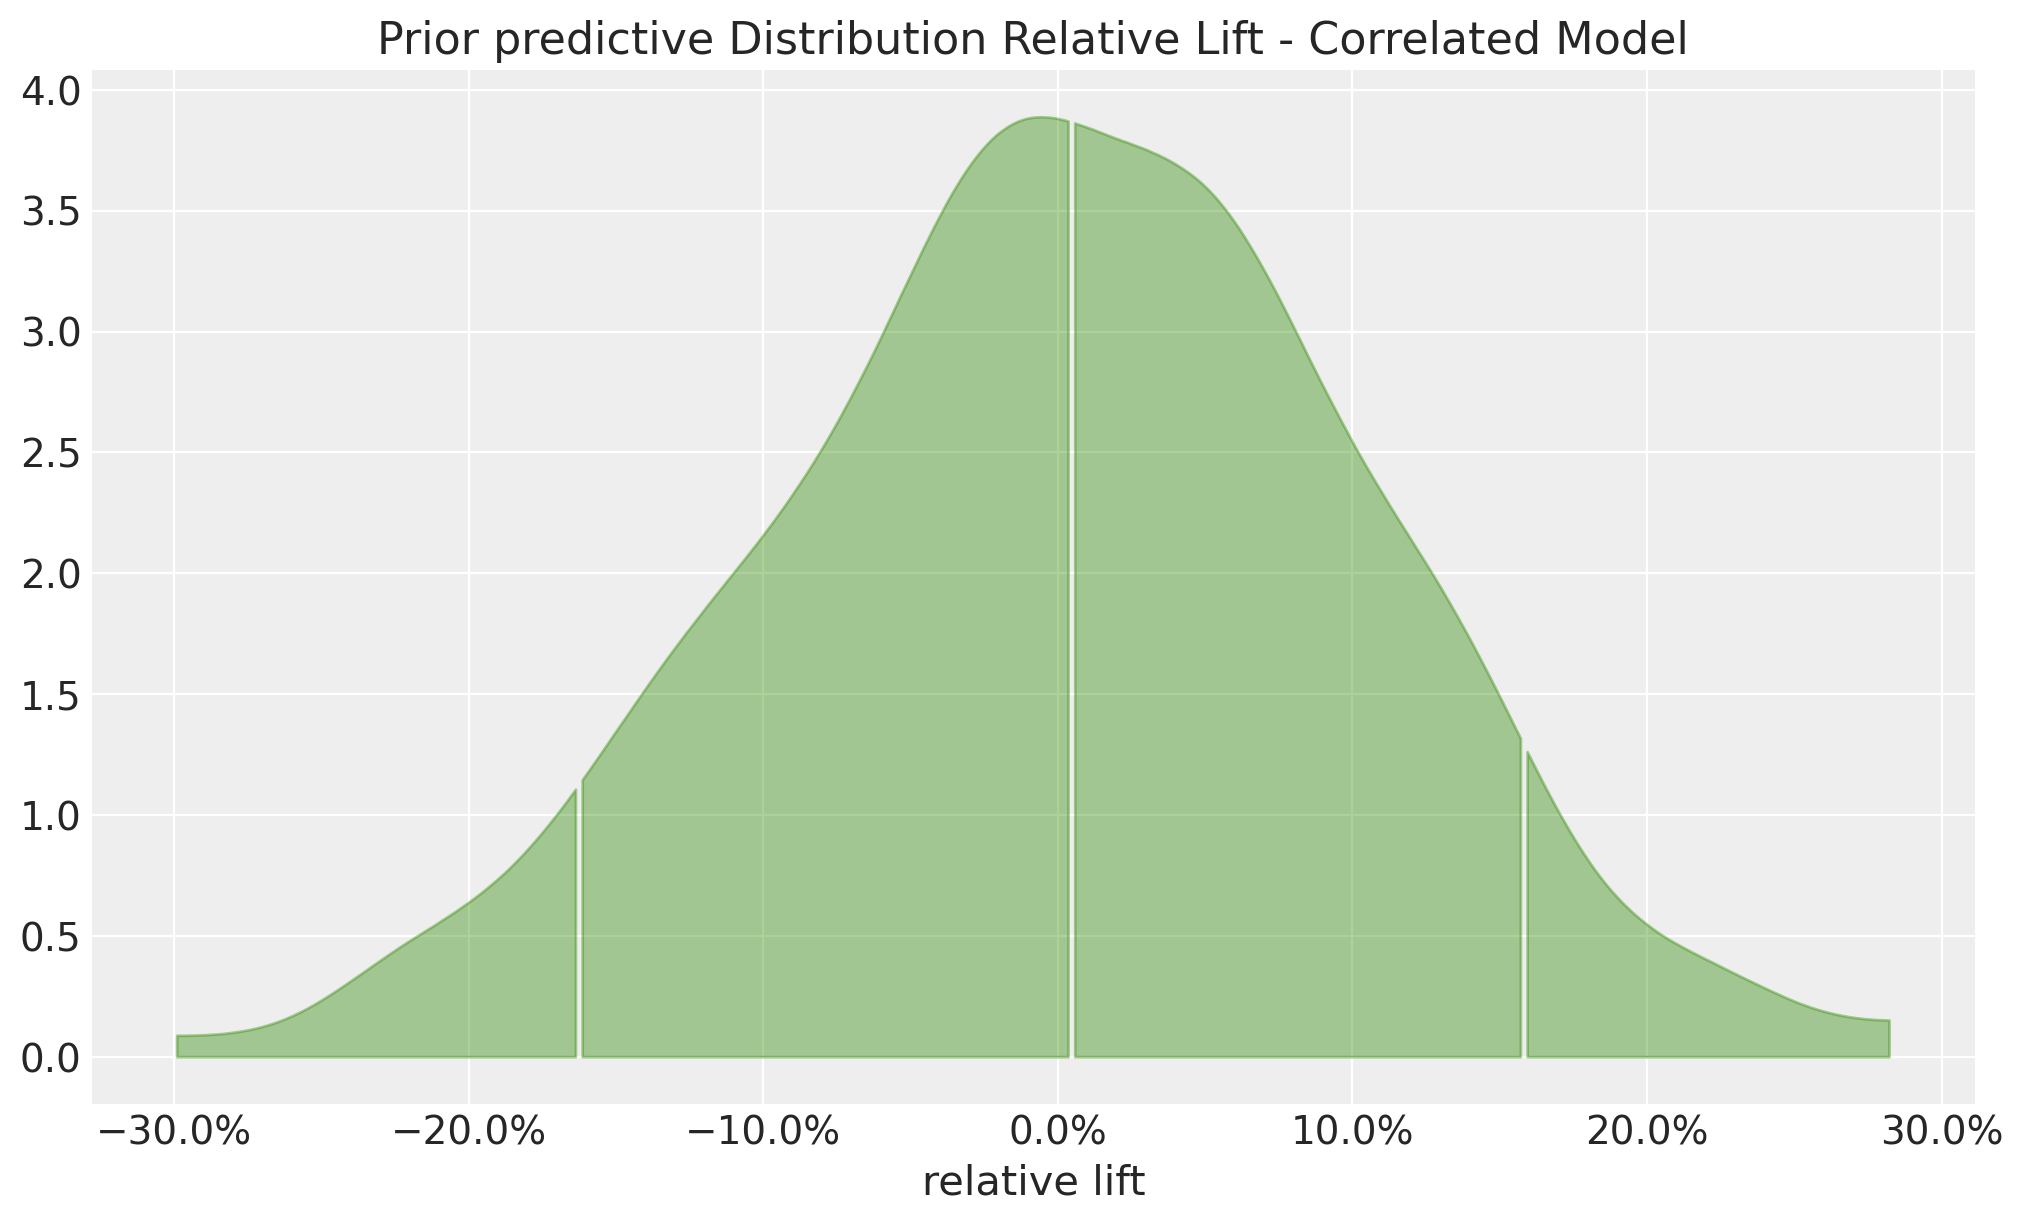

In [19]:
fig, ax = plt.subplots()
az.plot_dist(
    correlated_prior_samples["prior"]["relative_lift"],
    color="C2",
    quantiles=[0.06, 0.5, 0.94],
    fill_kwargs={"alpha": 0.4},
    ax=ax,
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.set(
    title="Prior predictive Distribution Relative Lift - Correlated Model",
    xlabel="relative lift",
);


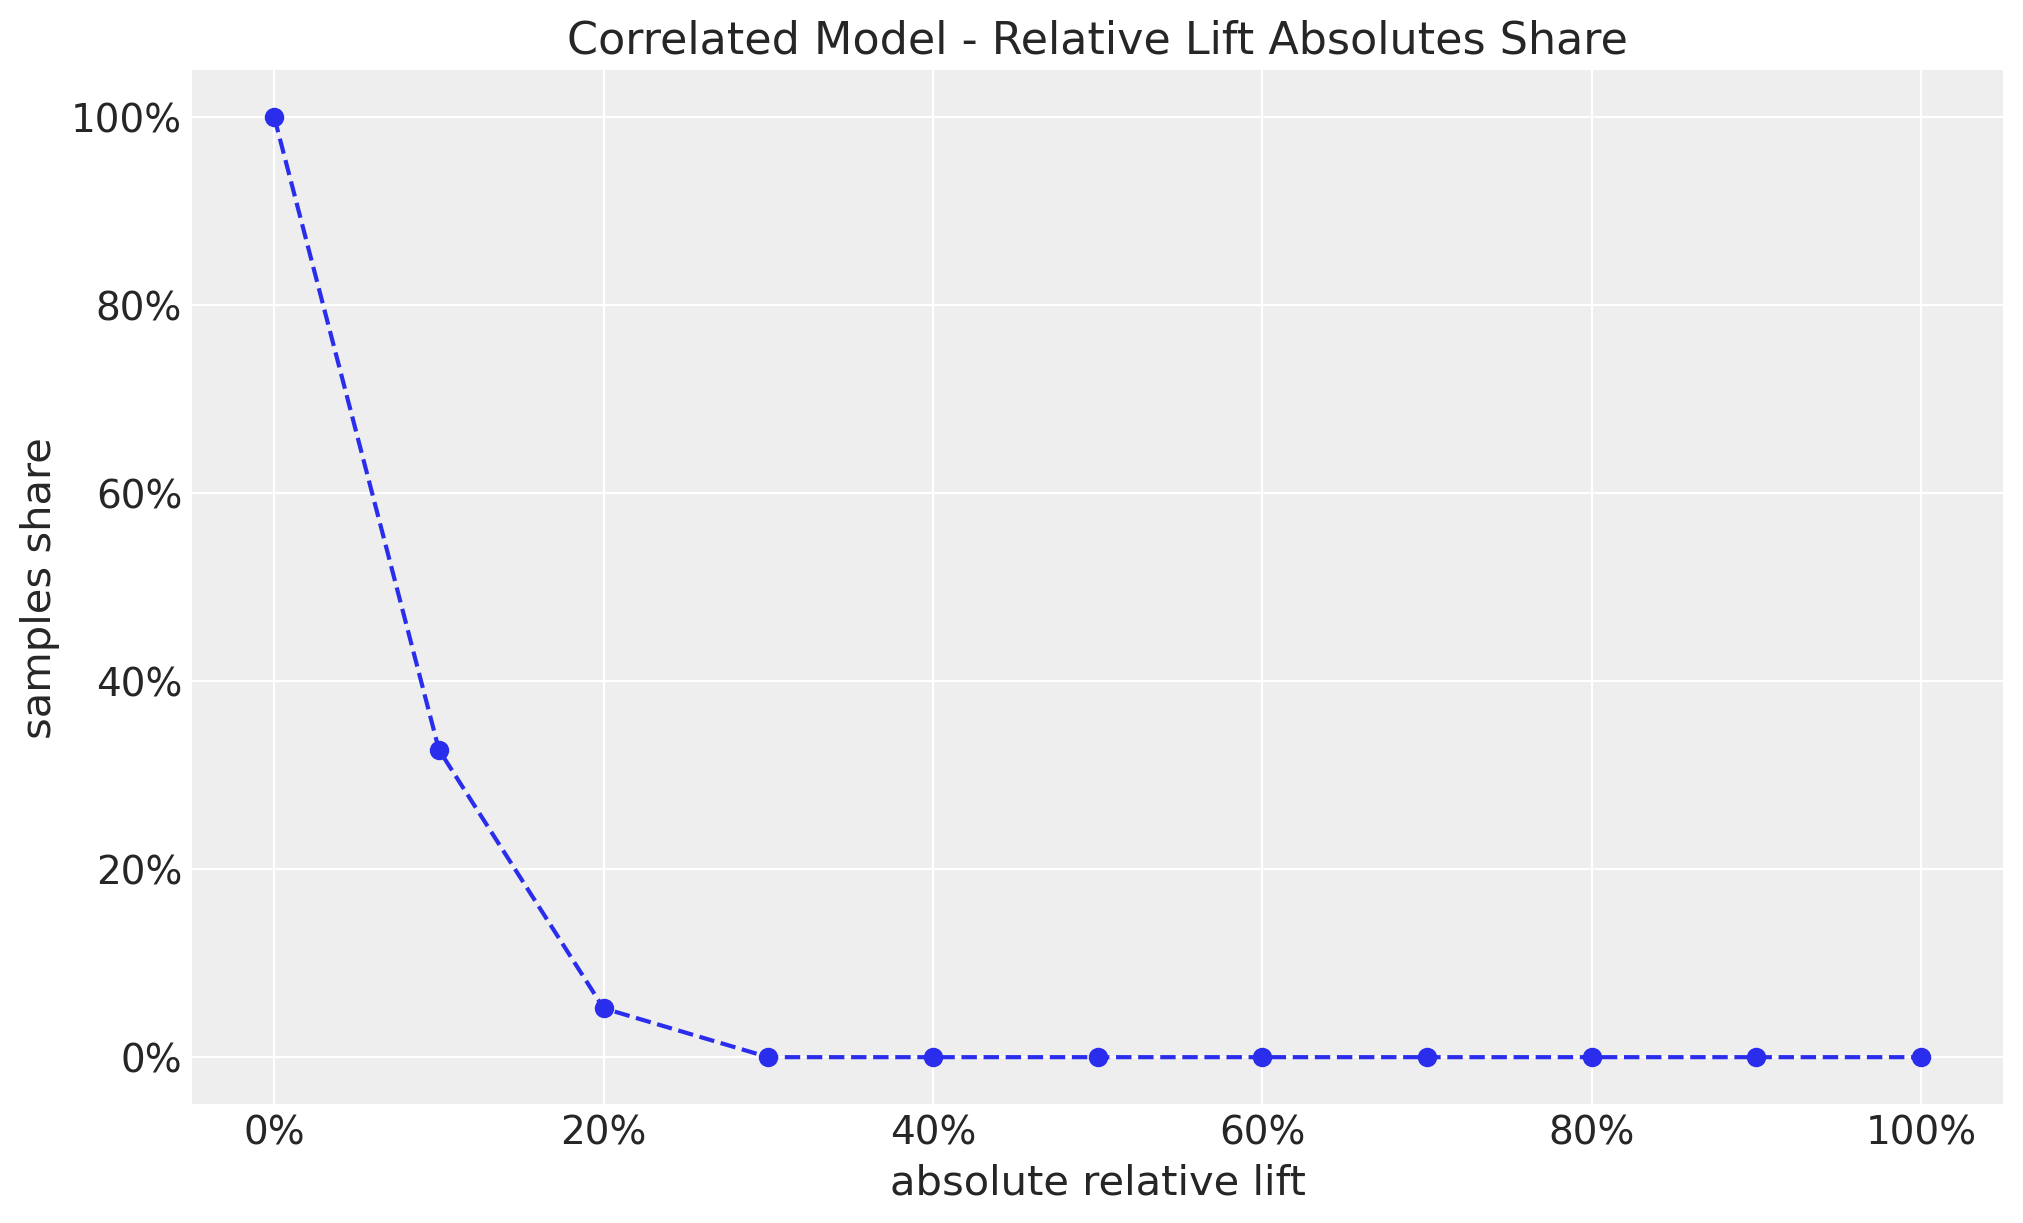

In [20]:
thresholds = np.linspace(start=0, stop=1, num=11)

shares = [
    (np.abs(correlated_prior_samples["prior"]["relative_lift"]) >= threshold).mean()
    for threshold in thresholds
]

fig, ax = plt.subplots()
ax.plot(thresholds, shares, marker="o", linestyle="--", color="C0")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.set(
    title="Correlated Model - Relative Lift Absolutes Share",
    xlabel="absolute relative lift",
    ylabel="samples share",
);


## Model Comparison

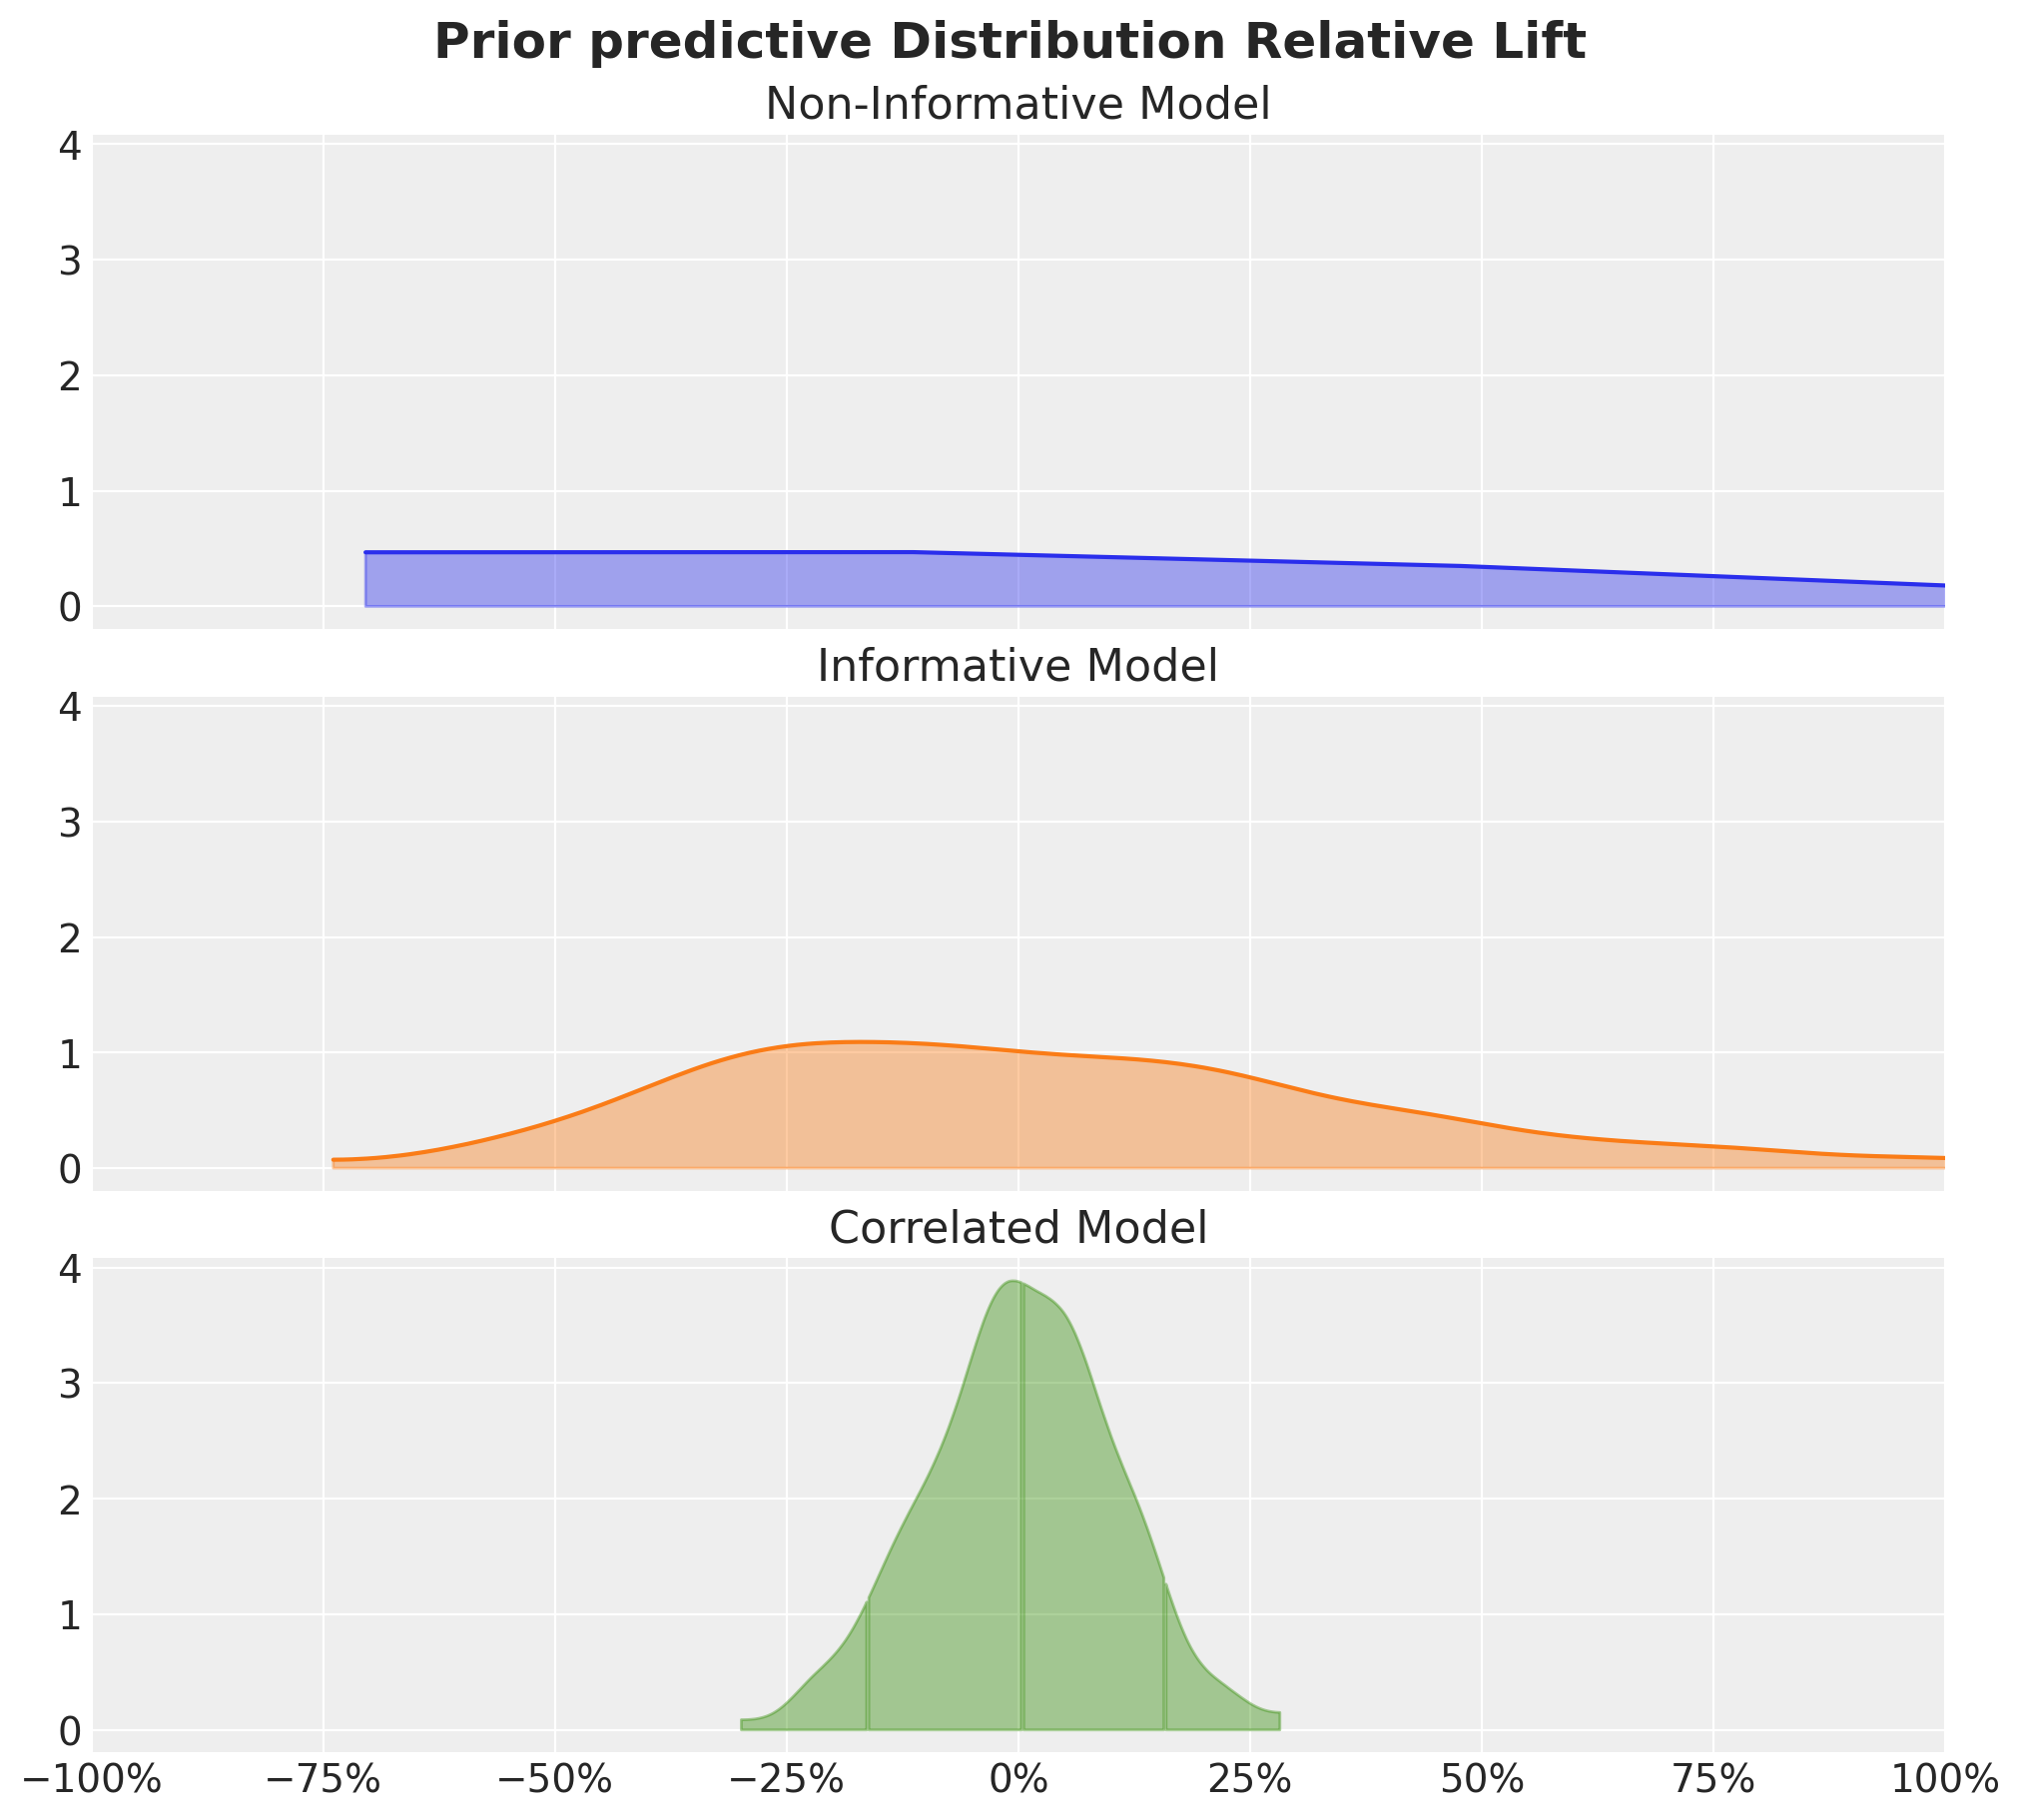

In [21]:
fig, ax = plt.subplots(
    nrows=3, ncols=1, figsize=(10, 9), sharex=True, sharey=True, layout="constrained"
)

az.plot_dist(
    non_informative_prior_samples["prior"]["relative_lift"],
    color="C0",
    fill_kwargs={"alpha": 0.4},
    ax=ax[0],
)
ax[0].set(title="Non-Informative Model")

az.plot_dist(
    informative_prior_samples["prior"]["relative_lift"],
    color="C1",
    fill_kwargs={"alpha": 0.4},
    ax=ax[1],
)
ax[1].set(title="Informative Model")

az.plot_dist(
    correlated_prior_samples["prior"]["relative_lift"],
    color="C2",
    quantiles=[0.06, 0.5, 0.94],
    fill_kwargs={"alpha": 0.4},
    ax=ax[2],
)
ax[2].set(title="Correlated Model", xlim=(-1, 1))
ax[2].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

fig.suptitle(
    "Prior predictive Distribution Relative Lift", fontsize=18, fontweight="bold"
);


## Inference

In [22]:
# Observed Data
n = 10_000
n_control = 200
n_treatment = 350

In [23]:
empirical_uplift = (n_treatment / n_control) - 1
empirical_uplift

0.75

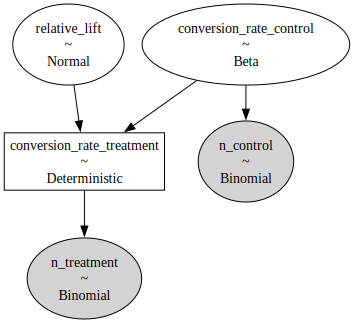

In [24]:
with correlated_model:
    pm.Binomial("n_control", n=n, p=conversion_rate_control, observed=n_control)
    pm.Binomial("n_treatment", n=n, p=conversion_rate_treatment, observed=n_treatment)

pm.model_to_graphviz(correlated_model)

In [25]:
with correlated_model:
    correlated_posterior_samples = pm.sample(draws=1_000, chains=4, random_seed=rng)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate_control, relative_lift]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


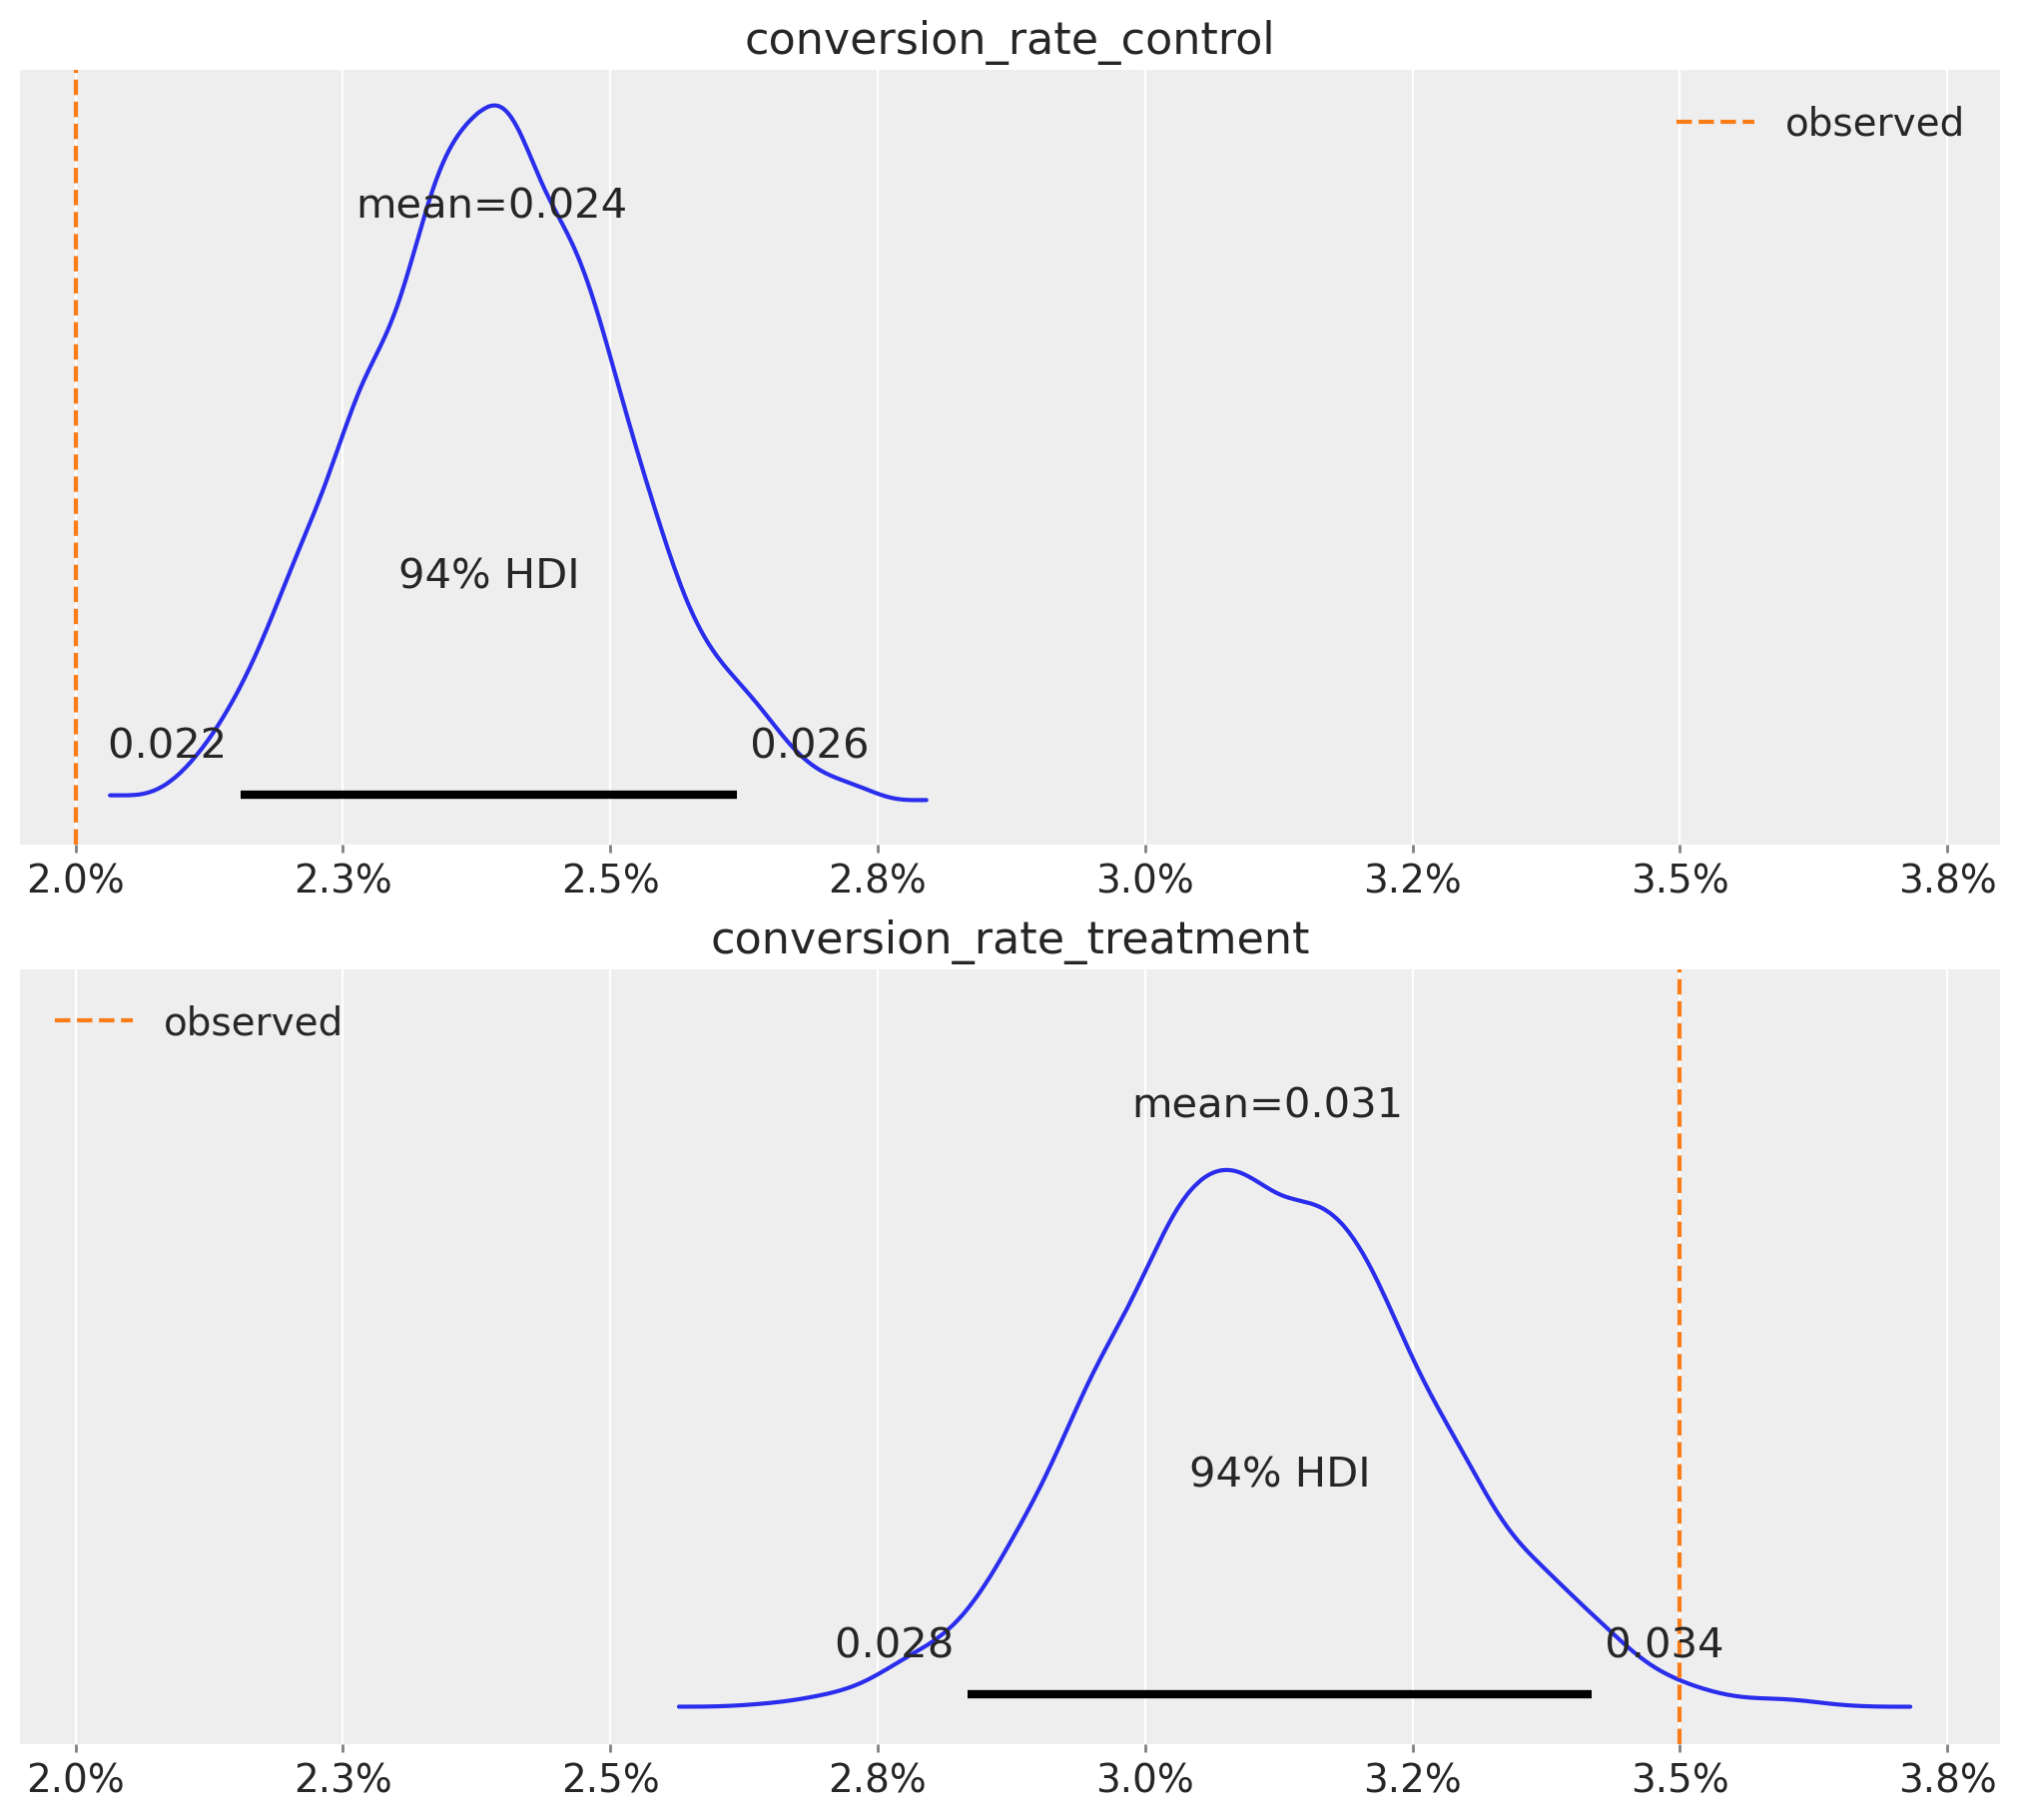

In [26]:
fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 9), sharex=True, sharey=True, layout="constrained"
)

az.plot_posterior(
    correlated_posterior_samples,
    var_names=[
        "conversion_rate_control",
        "conversion_rate_treatment",
    ],
    ax=axes,
)

for i, ax in enumerate(axes):
    obs = n_control / n if i == 0 else n_treatment / n
    ax.axvline(x=obs, color="C1", linestyle="--", label="observed")
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
    ax.legend()

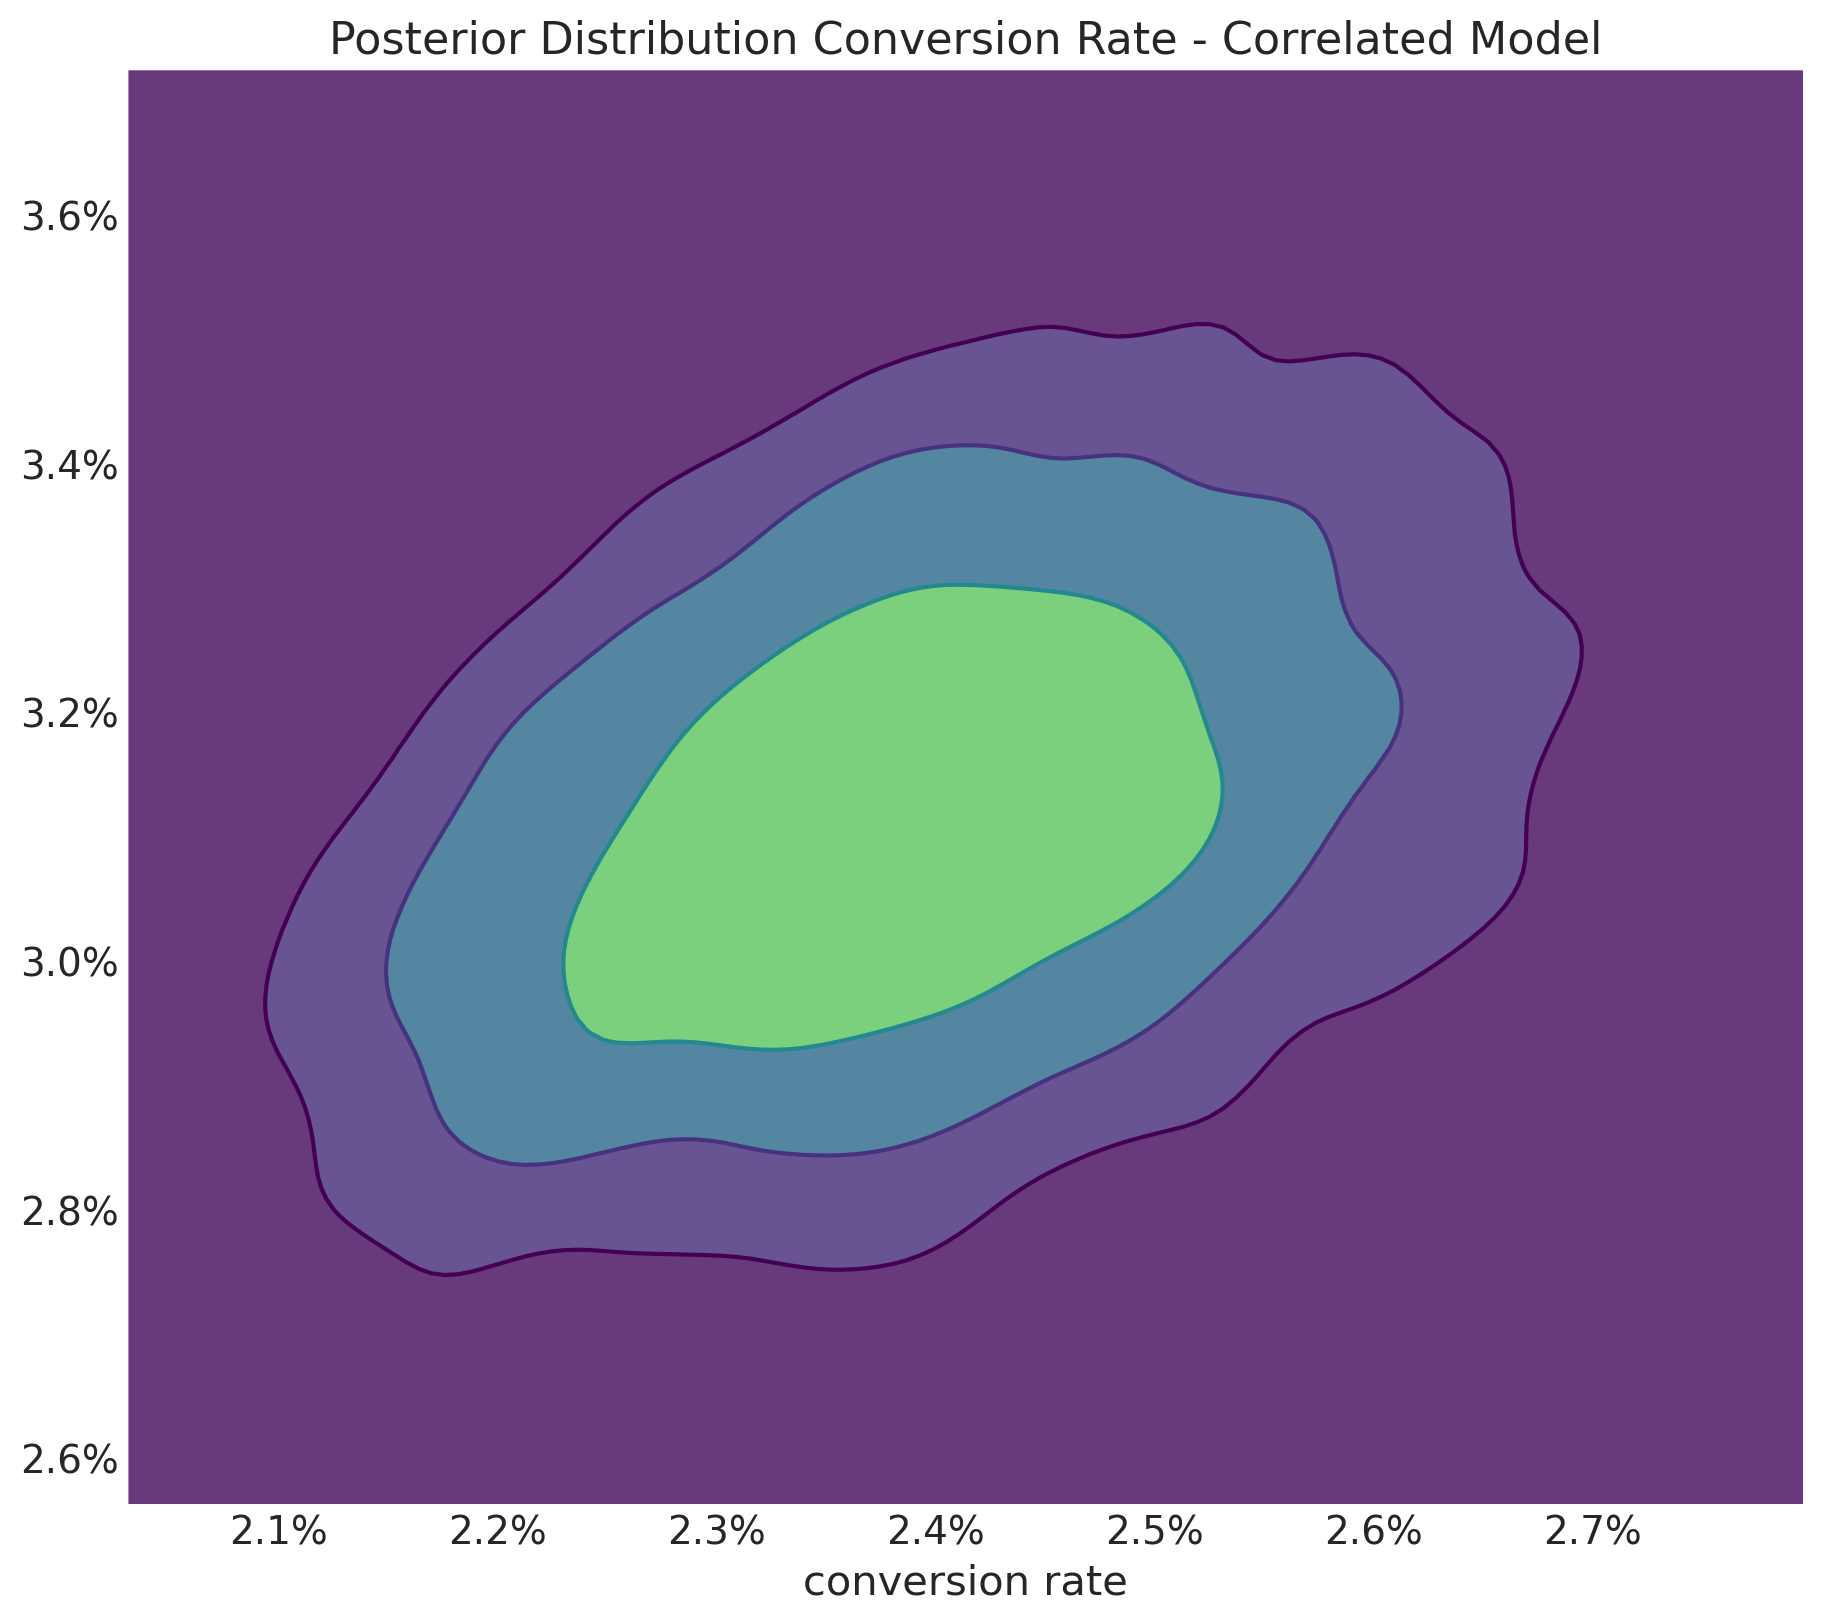

In [27]:
fig, ax = plt.subplots(figsize=(9, 8))
az.plot_dist(
    values=correlated_posterior_samples["posterior"]["conversion_rate_control"],
    values2=correlated_posterior_samples["posterior"]["conversion_rate_treatment"],
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis},
    contourf_kwargs={"alpha": 0.8},
    ax=ax,
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax.set(
    title="Posterior Distribution Conversion Rate - Correlated Model",
    xlabel="conversion rate",
);

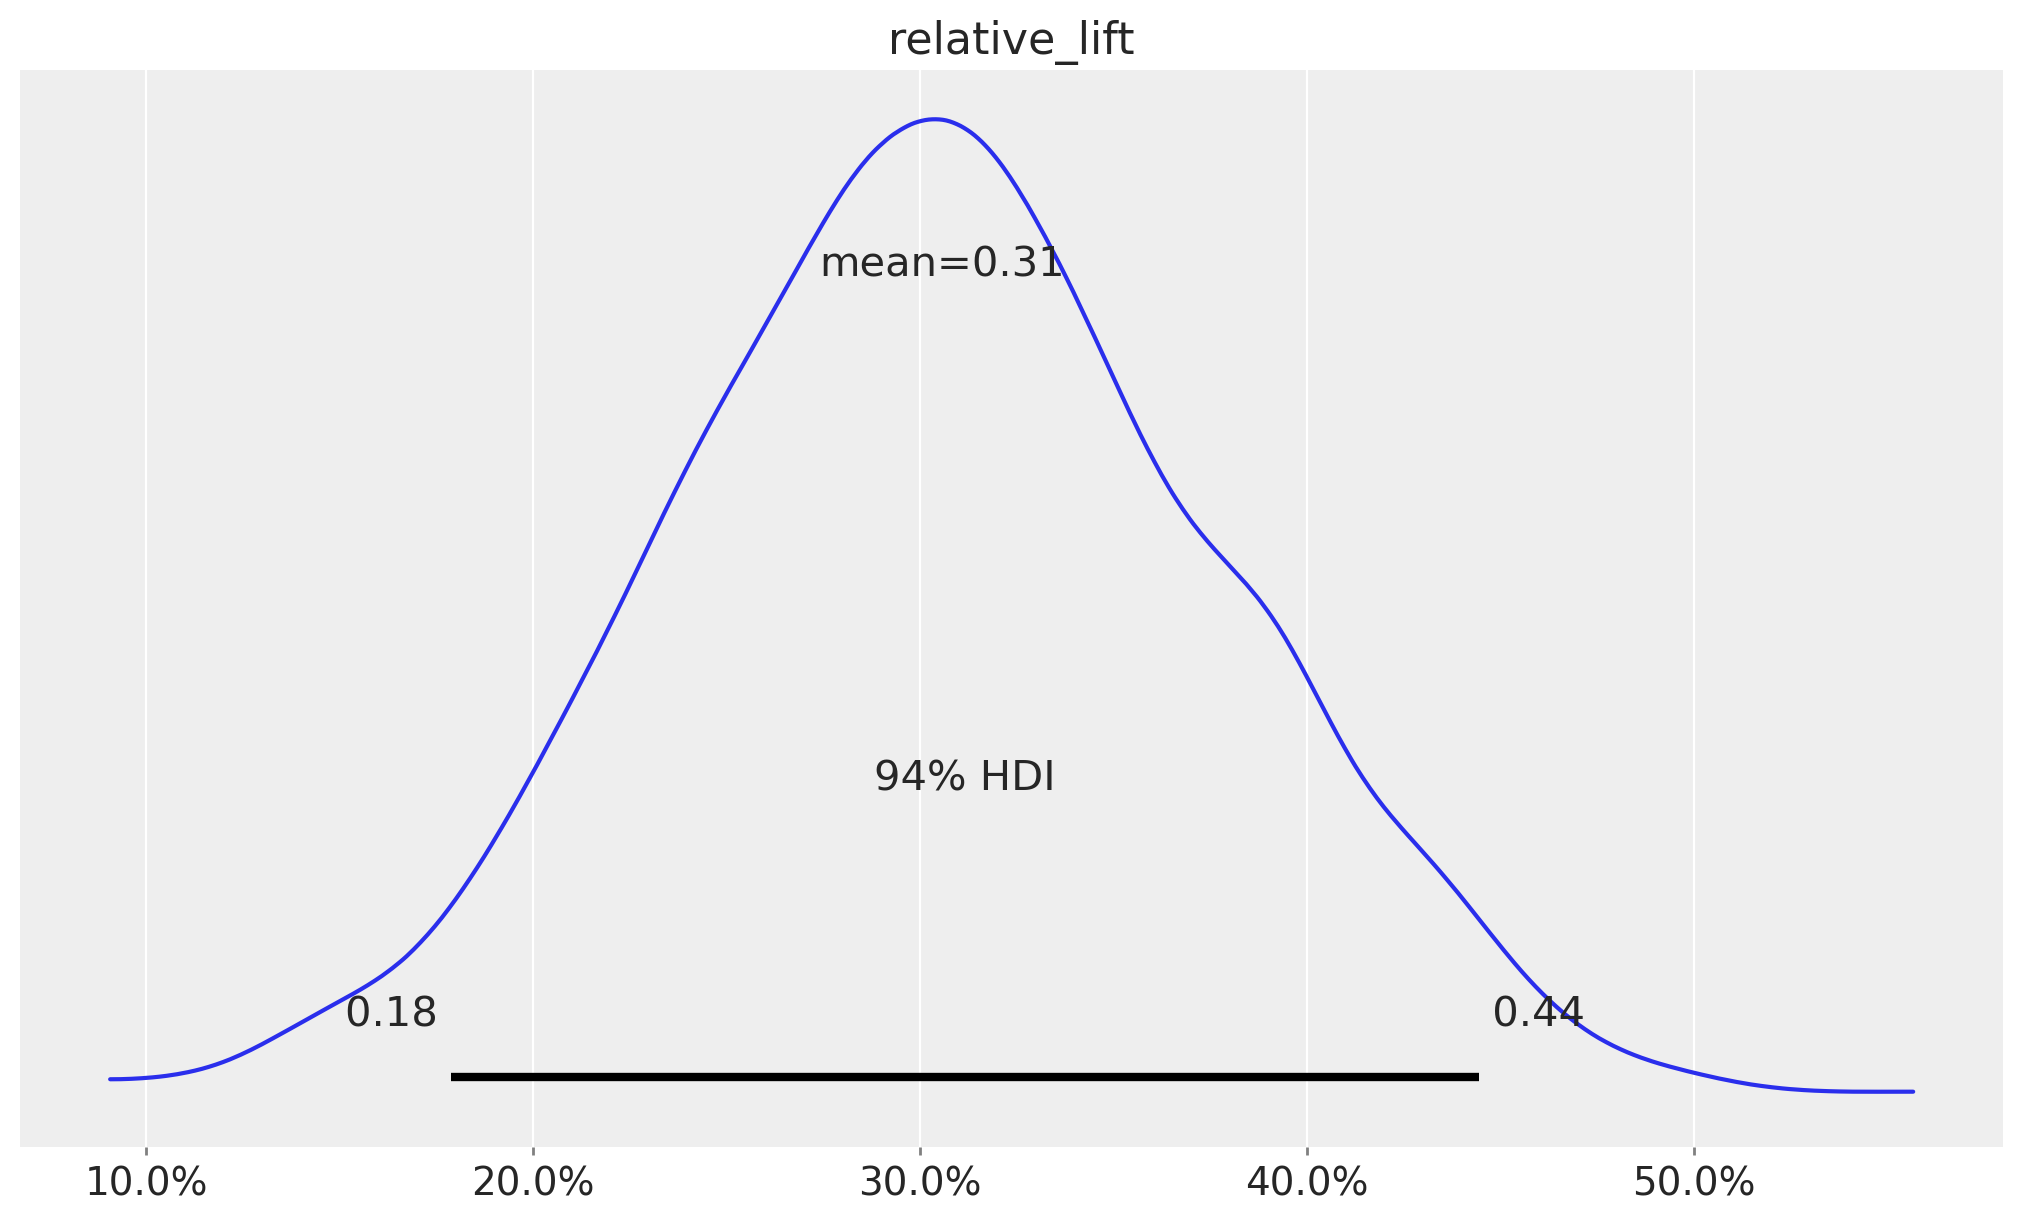

In [28]:
ax = az.plot_posterior(
    correlated_posterior_samples,
    var_names=["relative_lift"],
)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1));

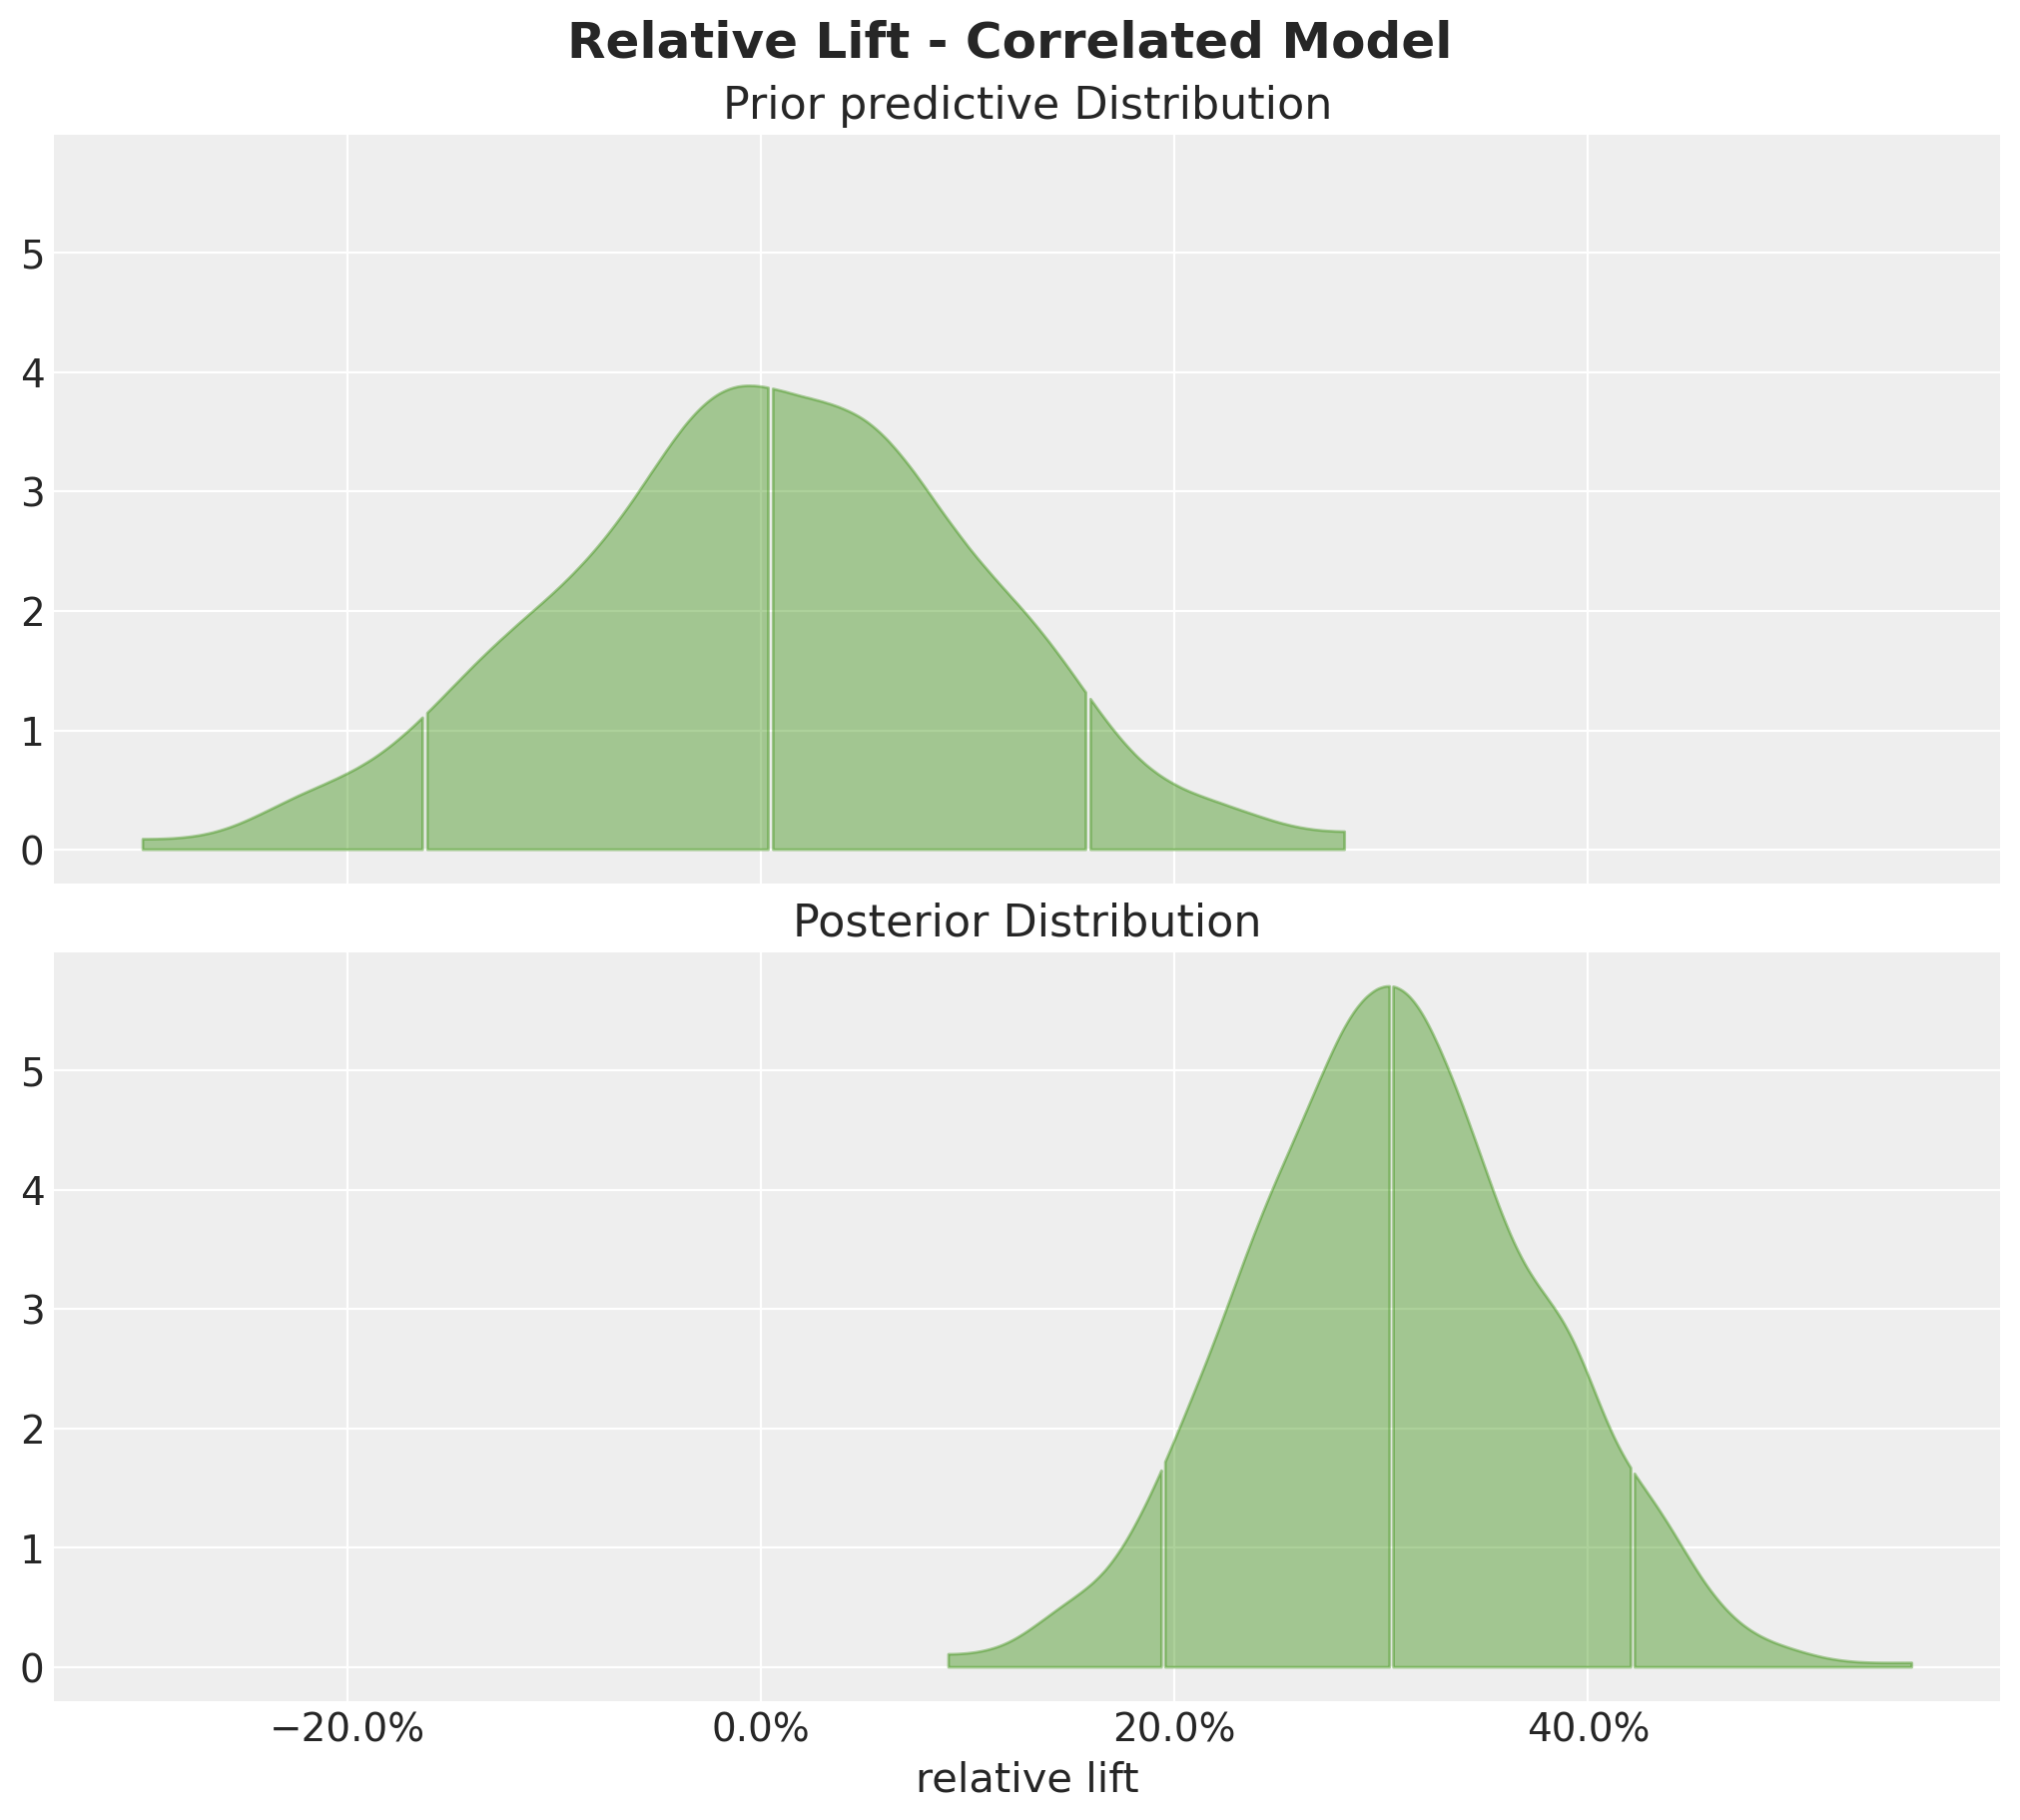

In [29]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 9), sharex=True, sharey=True, layout="constrained"
)

az.plot_dist(
    correlated_prior_samples["prior"]["relative_lift"],
    color="C2",
    quantiles=[0.06, 0.5, 0.94],
    fill_kwargs={"alpha": 0.4},
    ax=ax[0],
)
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax[0].set(title="Prior predictive Distribution")
az.plot_dist(
    correlated_posterior_samples["posterior"]["relative_lift"],
    color="C2",
    quantiles=[0.06, 0.5, 0.94],
    fill_kwargs={"alpha": 0.4},
    ax=ax[1],
)
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
ax[1].set(title="Posterior Distribution", xlabel="relative lift")

fig.suptitle("Relative Lift - Correlated Model", fontsize=18, fontweight="bold");